<a href="https://www.kaggle.com/mostafaelbohy/no-show-appointments?scriptVersionId=86756037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Investigating Dataset For "No-Show Appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Our investigation is for the "No-Show Appointments" Data set,This is a dataset collects information from 100k medical appointments in Brazil.       
>The investegation is trying to focus on the question of whether or not the Patients show upfor their appointments;
>
>The Dataset is providing some characteristics about each appointment, we have data for 100k appointments in fourteen columns showed as the following:
>
>PatientId
>
>AppointmentID
>
>Gender
>
>ScheduledDay
>
>AppointmentDay
>
>Age
>
>Neighbourhood
>
>Scholarship
>
>Hipertension
>
>Diabetes
>
>Alcoholism
>
>Handcap
>
>SMS_received
>
>No-show
>
>Depending on these variables we will try to ask question trying to find the relation between these variables and the attendance of patients for their appointments. we may use these variables to produce more detailed data to help in our investigation.

>
>
>To Can investigate our data we need firstly to:
>
>Wrangle our Data, by cleaning our data and removing any dublicated or any data may be misleading in our investigation then assessing the cleaned data to be finally ready to deal with the data .
>
>
>



> ### Questions to explore the Factors affecting the attendance:

>Q1: How far the **gender** of the patient is affecting on the attendance? 
>
>Q2: Does Reminding patient with **SMS** can be a factor for more attendance?
>
>Q3: Do the Patients who enrolled in **Brasilian welfare program** tends to attend their appointments with higher percentage?
>
>Q4: Is there a relation between the **day of the appointment** and the percentage of attendance?
>
>Q5: Is the attendance affected by the **neighbourhood** of the hospital?
>
>Q6: How is the correlation between the patients' **age** and thier attendance?
>
>Q7: Can the attendance of the Appointments get affected by the **diseases** of the patients?
>
>Q8: Is there a direct relation between **Alcoholism** and the attendence of the appointments?

>
>
>
>
>Along the way of our investigation we will try to keep it clear, we will try to keep ambiguity away by providing guiding notes and explantion for variables or any steps we will take.
>


<a id='wrangling'></a>
## Data Wrangling


### General Properties

####  Loading and Indentifying the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

starting by importing the packages we gonna need

In [2]:
df = pd.read_csv("../input/noshow-appointments/noshowappointments-kagglev2-may-2016.csv")

loading the file of the raw data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

quick preview for the data form and it's shape.
we can notice some coulmns' names to be edited,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


investigate for information about data types. 
we got a quick preview for the columns and the data types, 
Some columns' types need to be changed,

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

checking if there any missing data, fortunatelly we have no missing data.

In [7]:
df.duplicated().sum()

0

In [8]:
df['AppointmentID'].duplicated().sum()

0

it was a check for any duplicated data, and again we have no duplicates.

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the mean of ages of the patients is 37

we have patient(s) with age=-1, so we need to deal with these data.

In [10]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

we check for how many patient with an age with a negative value,
>
>we found only one patient with an age=-1 

In [11]:
print("Gender: ",df.Gender.unique())
print("Age: ",sorted(df.Age.unique()))
print("Neighbourhood: ",df.Neighbourhood.unique())
print("Diabetes: ",df.Diabetes.unique())
print("Alcoholism: ",df.Alcoholism.unique())
print("Hypertension: ",df.Hipertension.unique())
print("Handicap: ",df.Handcap.unique())
print("Scholarship: ",df.Scholarship.unique())
print("SMS_Received: ",df.SMS_received.unique())
print("No_Show: ",df['No-show'].unique())

Gender:  ['F' 'M']
Age:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood:  ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'


  by investigating the unique values of our variables we can see the variables we would face i our investigation.


### Data Cleaning 
#### (Modyfing Columns, Removing errored data, rename variables, remove unnecessary columns, adding columns and changing types of variables)

 

In [12]:
df.columns=["patient_id", "appointment_id", "gender", "scheduled_day", "appointment_day", "age", "neighbourhood", 
            "scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "sms_received", "no_show"]
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


rename columns for easier dealing with data

In [13]:
df["scheduled_day"]= df.scheduled_day.apply(np.datetime64).dt.normalize()
df["appointment_day"]= pd.to_datetime(df.appointment_day).dt.date.astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  float64       
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

change the type of the columns of the appointment day and the scheduled day

In [14]:
df['patient_id'] = df['patient_id'].astype('int64') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

change the type of column of Patient id  to be intger.

In [15]:
df["no_show"].replace(to_replace='No', value='0', inplace=True)
df["no_show"].replace(to_replace='Yes', value='1', inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [16]:
df["no_show"]=df.no_show.astype("int64")

change the values of "no_show" columns to be (0-1) and integer.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  int64         
dtypes: datetime64[ns](2)

recheck the types of the columns.

In [18]:
df=df[df.age>-1]
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


remove the appointment of the patient of age=-1

In [19]:
df['appointment_lead_days'] = (df.appointment_day - df.scheduled_day).dt.days
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


adding a new column for the days between the scheduled day and the appointment day with name "appointment_lead_days".

appointment_lead_days: variable for the days between appointment_day and scheduled_day

In [20]:
df['appointment_weekday']= pd.to_datetime(df.appointment_day).dt.day_name()
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days,appointment_weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Friday


adding a new column for the week day of the appointment day with name "appointment_weekday".

appointment_weekday: variable for the day of the week of the appointment_day.

In [21]:
df.drop(["patient_id", "appointment_id", "scheduled_day"], axis=1 , inplace=True)


removing the columns "patient_id", "appointment_id", and "scheduled_day" as we will not need them in our further investigation.

In [22]:
df.head()

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days,appointment_weekday
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Friday
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Friday
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Friday
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Friday
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Friday


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   gender                 110526 non-null  object        
 1   appointment_day        110526 non-null  datetime64[ns]
 2   age                    110526 non-null  int64         
 3   neighbourhood          110526 non-null  object        
 4   scholarship            110526 non-null  int64         
 5   hypertension           110526 non-null  int64         
 6   diabetes               110526 non-null  int64         
 7   alcoholism             110526 non-null  int64         
 8   handicap               110526 non-null  int64         
 9   sms_received           110526 non-null  int64         
 10  no_show                110526 non-null  int64         
 11  appointment_lead_days  110526 non-null  int64         
 12  appointment_weekday    110526 non-null  obje

the data form after cleaning and the whole Wrangling process.

<a id='eda'></a>
## Exploratory Data Analysis

> *Now we can start to ask question and seek for answers that show the factors affecting the attendance of patients.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   gender                 110526 non-null  object        
 1   appointment_day        110526 non-null  datetime64[ns]
 2   age                    110526 non-null  int64         
 3   neighbourhood          110526 non-null  object        
 4   scholarship            110526 non-null  int64         
 5   hypertension           110526 non-null  int64         
 6   diabetes               110526 non-null  int64         
 7   alcoholism             110526 non-null  int64         
 8   handicap               110526 non-null  int64         
 9   sms_received           110526 non-null  int64         
 10  no_show                110526 non-null  int64         
 11  appointment_lead_days  110526 non-null  int64         
 12  appointment_weekday    110526 non-null  obje

In [25]:
df.head()

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days,appointment_weekday
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Friday
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Friday
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Friday
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Friday
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Friday


In [26]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,10.183794
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15.255034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


Quick review for the cleaned data and overview for the data

  ###  Number of Appointments and the Attendance

In [27]:
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

In [28]:
appointments = df.shape[0]
attendance = len(df.query('no_show == 0'))
absence = len(df.query('no_show == 1'))
attendance_ratio = (attendance/appointments*100)
absence_ratio = (absence/appointments*100)
print("No. of appointments is: {}\nNo. of attendants is: {}, with attendace ratio= {}%\nNo. of absents is: {}, with absence ratio={}"
      .format(appointments,attendance,attendance_ratio,absence,absence_ratio))

No. of appointments is: 110526
No. of attendants is: 88207, with attendace ratio= 79.80656135208005%
No. of absents is: 22319, with absence ratio=20.193438647919944


appointments: total number of appointments in the data-set.

attendance: total number of the attended appointments.

absence: total number of the missed appointments.

attendance_ratio: percentage of the attended appointments out of the whole appointments.

absence_ratio: percentage of the missed appointments out of the whole appointments.

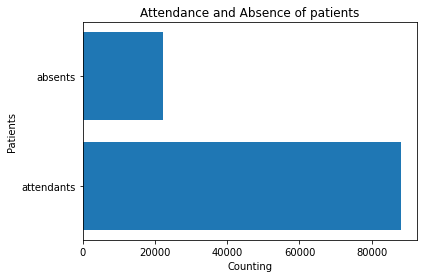

In [29]:
plt.barh(["attendants","absents"],[attendance,absence])
plt.title("Attendance and Absence of patients")
plt.xlabel("Counting")
plt.ylabel("Patients");

In [30]:
def counting(dataframe, column):
    sns.countplot(x=column,data=dataframe).set(title="Attendance of Patients")
   

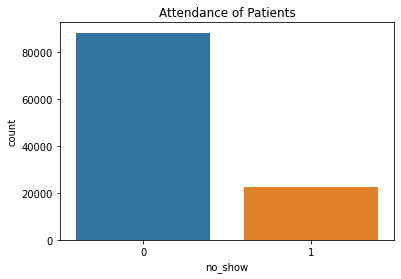

In [31]:
counting(df,'no_show')

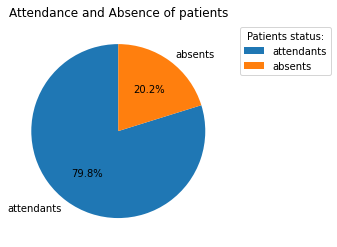

In [32]:
plt.pie([attendance_ratio,absence_ratio],labels=["attendants","absents"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance and Absence of patients")
plt.legend(title = "Patients status:" , loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

showing the number of the whole appointments, 

and show the portion of attendance and the portion of absence, and the percentages for each. 

### Q1: How far the gender of the patient is affecting on the attendance?

In [33]:
df.gender.value_counts()


F    71839
M    38687
Name: gender, dtype: int64

In [34]:
f_appointments=len(df[df['gender'] == 'F'])
m_appointments=len(df[df['gender'] == 'M'])
f_appointments_ratio= f_appointments/appointments
m_appointments_ratio= m_appointments/appointments

print("No. of Appointments for Female patients is: {}, with ratio={}%\nNo. of Appointments for Male patients is: {}, with ratio={}%"
     .format(f_appointments,f_appointments_ratio,m_appointments,m_appointments_ratio))

No. of Appointments for Female patients is: 71839, with ratio=0.6499737618297957%
No. of Appointments for Male patients is: 38687, with ratio=0.3500262381702043%


f_appointments: no. of appointments for female patients.

m_appointments: no. of appointments for male patients.

f_appointments_ratio: percentage of female appointments out of the whole appointments.

m_appointments_ratio: percentage of male appointments out of the whole appointments.

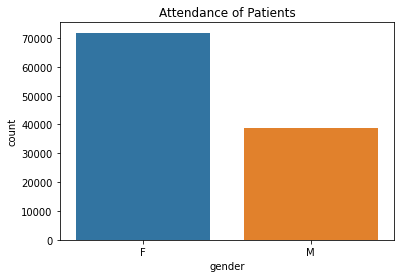

In [35]:
counting(df,"gender")

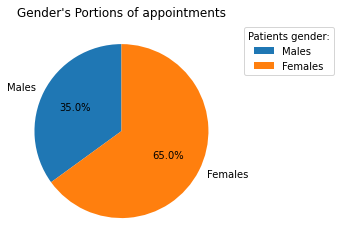

In [36]:
plt.pie([m_appointments_ratio,f_appointments_ratio],labels=["Males","Females"], startangle=90, autopct='%1.1f%%')
plt.title("Gender's Portions of appointments")
plt.legend(title = "Patients gender:" , loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Extracting the number of females and males patients,

and getting the portion of each gender out of the whole appointments.


In [37]:
df.groupby('gender')['no_show'].value_counts()


gender  no_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: no_show, dtype: int64

In [38]:
f_att=len(df.query('gender == "F" and no_show == 0'))
f_abs=len(df.query('gender == "F" and no_show == 1'))
m_att=len(df.query('gender == "M" and no_show == 0'))
m_abs=len(df.query('gender == "M" and no_show == 1'))

f_att_ratio= f_att/f_appointments*100
m_att_ratio= m_att/m_appointments*100

print("No. of attending females is: {} out of {} appointments, with ratio= {}% out of their scheduled appointments.\nNo. of attending males is: {} out of {} appointments,  with ratio= {}% out of their scheduled appointments."
      .format(f_att, f_appointments ,f_att_ratio, m_att,m_appointments, m_att_ratio))

No. of attending females is: 57245 out of 71839 appointments, with ratio= 79.68512924734476% out of their scheduled appointments.
No. of attending males is: 30962 out of 38687 appointments,  with ratio= 80.03205211052808% out of their scheduled appointments.


f_att: no. of the female appointments that attended.

f_abs:  no. of the female appointments that missed.

f_att_ratio: percentage of attendance for female appointments.

m_att: no. of the male appointments that attended.

m_abs: no. of the male appointments that missed.

m_att_ratio: percentage of attendance for male appointments.

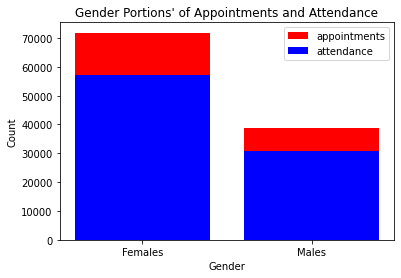

In [39]:
plt.bar(["Females","Males"],[f_appointments, m_appointments], color='r')
plt.bar(["Females","Males"],[f_att, m_att],color='b')
plt.legend( ('appointments', 'attendance'))
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Portions' of Appointments and Attendance")
plt.show()

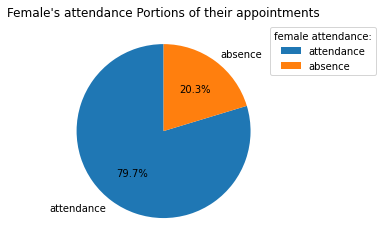

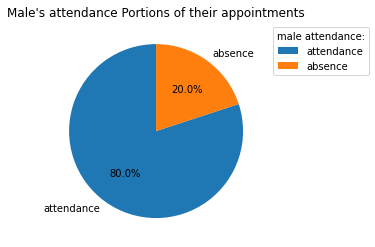

In [40]:
plt.pie([f_att,(f_appointments-f_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Female's attendance Portions of their appointments")
plt.legend(title = "female attendance:" , loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([m_att,(m_appointments-m_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Male's attendance Portions of their appointments")
plt.legend(title = "male attendance:" , loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


Getting the number of females patient attended their appointments and the percentage,

And getting the number of males patients attended their appointments and their percentage,

and ploting both on charts showing the counting and the percentage of attendance for both.

### Q2: Does Reminding patient with SMS can be a factor for more attendance?

In [41]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [42]:
get_sms=len(df[df['sms_received'] == 1])
no_sms=len(df[df['sms_received'] == 0])
get_sms_ratio= get_sms/appointments*100
no_sms_ratio= no_sms/appointments*100

print("No. of Appointments that reminded by sms is: {}, with ratio={}%\nWhile No. of Appointments without sms is: {}, with ratio={}%"
     .format(get_sms,get_sms_ratio,no_sms,no_sms_ratio))

No. of Appointments that reminded by sms is: 35482, with ratio=32.10285362720084%
While No. of Appointments without sms is: 75044, with ratio=67.89714637279916%


get_sms: no. of Patients get reminded by sms.

no_sms: no. of Patients haven't been reminded by sms.

get_sms_ratio: percentage of Patients get reminded by sms.

no_sms_ratio: percentage of Patients haven't been reminded by sms.

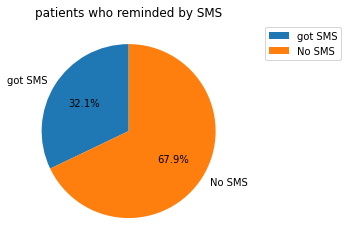

In [43]:
plt.pie([get_sms_ratio,no_sms_ratio],labels=["got SMS","No SMS"], startangle=90, autopct='%1.1f%%')
plt.title("patients who reminded by SMS")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Extracting the number of appointments that their patients get remindered by SMS and their Ratio out of the whole appointments, 

Also the patients who haven't received sms and their ratio

and plotting the ratios of both on pie chart.


In [44]:
df.groupby('sms_received')['no_show'].value_counts()


sms_received  no_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [45]:
g_sms_att=len(df.query('sms_received == 1 and no_show == 0'))
g_sms_abs=len(df.query('sms_received == 1 and no_show == 1'))
n_sms_att=len(df.query('sms_received == 0 and no_show == 0'))
n_sms_abs=len(df.query('sms_received == 0 and no_show == 1'))

g_sms_att_ratio= g_sms_att/get_sms*100
n_sms_att_ratio= n_sms_att/no_sms*100

print("No. of attending patients who have recieved sms is: {} out of {} patients, with ratio= {}% out of their scheduled appointments.\nNo. of attending patients who didn't receive sms is: {} out of {} patients,  with ratio= {}% out of their scheduled appointments."
      .format(g_sms_att, get_sms ,g_sms_att_ratio, n_sms_att,no_sms, n_sms_att_ratio))

No. of attending patients who have recieved sms is: 25698 out of 35482 patients, with ratio= 72.425455160363% out of their scheduled appointments.
No. of attending patients who didn't receive sms is: 62509 out of 75044 patients,  with ratio= 83.29646607323703% out of their scheduled appointments.


g_sms_att: no. of attendants of patient who have received sms.

g_sms_abs: no. of absents of patient who have received sms.

n_sms_att: no. of attendants of patient who haven't received sms.

n_sms_abs: no. of absents of patient who haven't received sms.

g_sms_att_ratio: percentage of attendance for the patients who have recieved sms. 

n_sms_att_ratio: percentage of attendance for the patients who haven't recieved sms.

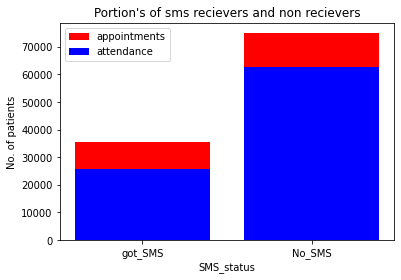

In [46]:
plt.bar(["got_SMS","No_SMS"],[get_sms, no_sms], color='r')
plt.bar(["got_SMS","No_SMS"],[g_sms_att, n_sms_att],color='b')
plt.legend( ('appointments', 'attendance'))
plt.xlabel("SMS_status")
plt.ylabel("No. of patients")
plt.title("Portion's of sms recievers and non recievers")
plt.show()

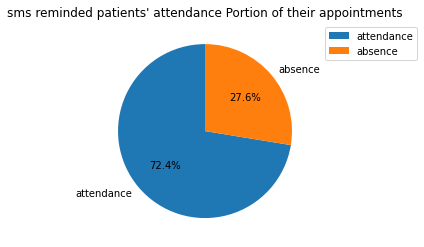

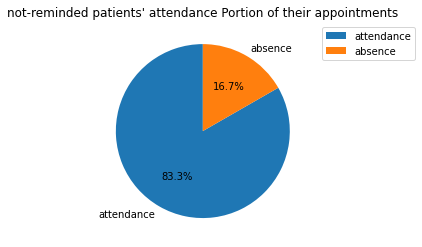

In [47]:
plt.pie([g_sms_att,(get_sms-g_sms_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("sms reminded patients' attendance Portion of their appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([n_sms_att,(no_sms-n_sms_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("not-reminded patients' attendance Portion of their appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


Getting the number of Patients who recieved SMS and attended their appointments and the percentage of their attendance to their appointments,

And also getting the number of  Patients who recieved SMS and attended their appointments and the percentage of their attendance to their appointments,

and ploting both on charts showing the counting and the percentage of attendance for both.

### Q3:  Do the Patients who enrolled in Brasilian welfare program tends to attend their appointments with higher percentage?

In [48]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [49]:
sch=len(df[df['scholarship']==1])
no_sch=len(df[df['scholarship']==0])

sch_ratio = sch/appointments*100
no_sch_ratio=no_sch/appointments*100

print("patients with scholarship= {}, with percentage={}% of the whole patients,\nWhile the patients without scholarship={}, with percentaage= {}% out of the whole patients."
      .format(sch,sch_ratio,no_sch,no_sch_ratio))

patients with scholarship= 10861, with percentage=9.826647123753688% of the whole patients,
While the patients without scholarship=99665, with percentaage= 90.17335287624631% out of the whole patients.


sch: no. of appointments for patients have scholarship.

no_sch: no. of appointments for patients haven't scholarship.

sch_ratio: percentage of appointments for patients have scholarship out of the whole appointments.

no_sch_ratio: percentage of appointments for patients haven't scholarship out of the whole appointments.

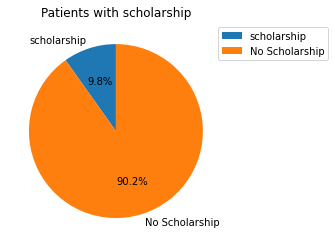

In [50]:
plt.pie([sch_ratio,no_sch_ratio],labels=["scholarship","No Scholarship"], startangle=90, autopct='%1.1f%%')
plt.title("Patients with scholarship")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Extracting the number of appointments that their patients have enrolled in the scholarship and their Ratio out of the whole appointments,

Also the patients who haven't enrolled in the scholarship and their ratio

and plotting the ratios of both on pie chart.

In [51]:
df.groupby('scholarship')['no_show'].value_counts()


scholarship  no_show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: no_show, dtype: int64

In [52]:
sch_att=len(df.query('scholarship == 1 and no_show == 0'))
sch_abs=len(df.query('scholarship == 1 and no_show == 1'))
no_sch_att=len(df.query('scholarship == 0 and no_show == 0'))
no_sch_abs=len(df.query('scholarship == 0 and no_show == 1'))

sch_att_ratio= sch_att/sch*100
no_sch_att_ratio= no_sch_att/no_sch*100

print("No. of attending patients who have scholarship is: {} out of {} patients, with ratio= {}% out of their scheduled appointments.\nNo. of attending patients who didn't scholarship is: {} out of {} patients,  with ratio= {}% out of their scheduled appointments."
      .format(sch_att, sch ,sch_att_ratio, no_sch_att,no_sch, no_sch_att_ratio))

No. of attending patients who have scholarship is: 8283 out of 10861 patients, with ratio= 76.26369579228432% out of their scheduled appointments.
No. of attending patients who didn't scholarship is: 79924 out of 99665 patients,  with ratio= 80.19264536196258% out of their scheduled appointments.


sch_att: No. of attending patients who have scholarship.

sch_abs: No. of absent patients who have scholarship.

no_sch_att: No. of attending patients who haven't scholarship.

no_sch_abs: No. of absents patients who haven't scholarship.

sch_att_ratio: percentage of attending patients who have scholarship out of their appointments.

no_sch_att_ratio: percentage of attending patients who haven't scholarship out of their appointments.

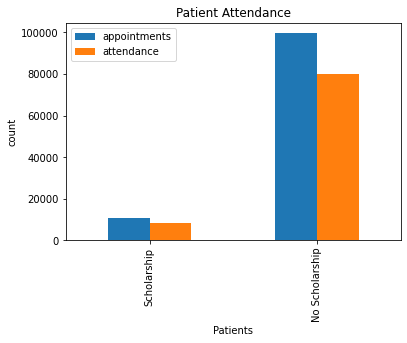

In [53]:
df_bar = pd.DataFrame([['Scholarship',sch,sch_att], ['No Scholarship', no_sch, no_sch_att]],
                  columns=['Patients', 'appointments', 'attendance'])

df_bar.plot(x='Patients',kind='bar', stacked=False, title='Patient Attendance', ylabel="count");

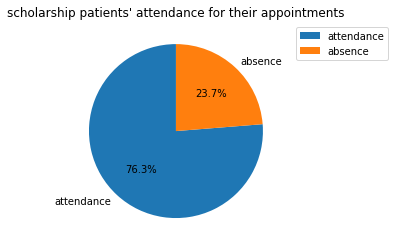

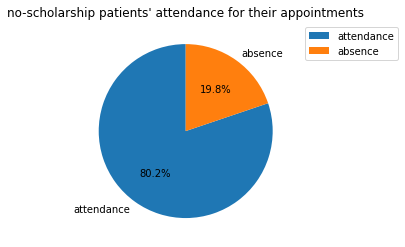

In [54]:
plt.pie([sch_att,(sch-sch_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("scholarship patients' attendance for their appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([no_sch_att,(no_sch-no_sch_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("no-scholarship patients' attendance for their appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


Getting the number of Patients who enrolled in the scholarship and attended their appointments and the percentage of their attendance to their appointments,

And also getting the number of  Patients who didn't enrolled in scholarship and attended their appointments and the percentage of their attendance to their appointments,

and ploting both on charts showing the counting and the percentage of attendance for both.

### Q4: Is there a relation between the day of the appointment and the percentage of attendance?

In [55]:
df.appointment_weekday.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: appointment_weekday, dtype: int64

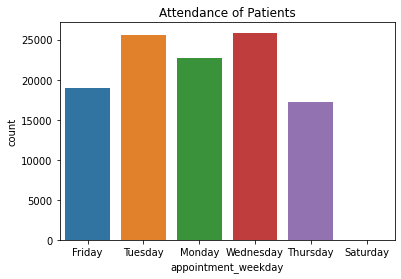

In [56]:
counting(df, "appointment_weekday")

In [57]:
sat_app=len(df[df['appointment_weekday']=="Saturday"])
sun_app=len(df[df['appointment_weekday']=="Sunday"])
mon_app=len(df[df['appointment_weekday']=="Monday"])
tue_app=len(df[df['appointment_weekday']=="Tuesday"])
wed_app=len(df[df['appointment_weekday']=="Wednesday"])
thr_app=len(df[df['appointment_weekday']=="Thursday"])
fri_app=len(df[df['appointment_weekday']=="Friday"])

sat_ratio=sat_app/appointments*100
sun_ratio=sun_app/appointments*100
mon_ratio=mon_app/appointments*100
tue_ratio=tue_app/appointments*100
wed_ratio=wed_app/appointments*100
thr_ratio=thr_app/appointments*100
fri_ratio=fri_app/appointments*100

print("Saturday has {} appointments, with {}% of appointments,\nSunday has {} appointments, with {}% of appointments,\nMonday has {} appointments, with {}% of appointments,\nTuesday has {} appointments, with {}% of appointments,\nWednesday has {} appointments, with {}% of appointments,\nThursday has {} appointments, with {}% of appointments,\nFridayhas {} appointments, with {}% of appointments."
     .format(sat_app,sat_ratio,sun_app,sun_ratio,mon_app,mon_ratio,tue_app,tue_ratio,wed_app,wed_ratio,thr_app,thr_ratio,fri_app,fri_ratio))

Saturday has 39 appointments, with 0.035285815102328866% of appointments,
Sunday has 0 appointments, with 0.0% of appointments,
Monday has 22714 appointments, with 20.55082062139225% of appointments,
Tuesday has 25640 appointments, with 23.19816151855672% of appointments,
Wednesday has 25867 appointments, with 23.40354305774207% of appointments,
Thursday has 17247 appointments, with 15.604473155637589% of appointments,
Fridayhas 19019 appointments, with 17.207715831569043% of appointments.


sat_app: no. of appointments on saturday.

sun_app: no. of appointments on sunday.

mon_app: no. of appointments on monday.

teu_app: no. of appointments on tuesday.

wed_app: no. of appointments on wednesday.

thr_app: no. of appointments on thursday.

fri_app: no. of appointments on friday.


sat_ratio: percentage of saturday's appointments out of the whole appointments.

sun_ratio: percentage of sunday's appointments out of the whole appointments.

mon_ratio: percentage of monday's appointments out of the whole appointments.

teu_ratio: percentage of tuesday's appointments out of the whole appointments.

wed_ratio: percentage of wednesday's appointments out of the whole appointments.

thr_ratio: percentage of thursday's appointments out of the whole appointments.

fri_ratio: percentage of friday's appointments out of the whole appointments.

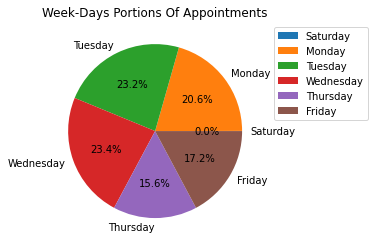

In [58]:
plt.pie([sat_ratio,mon_ratio,tue_ratio,wed_ratio,thr_ratio,fri_ratio],labels=['Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], startangle=0, autopct='%1.1f%%')
plt.title("Week-Days Portions Of Appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Getting the portion of appointments for each day of the week with percentage of each out of the whole appointments

and plotineg the shares of each day on a pie chart.

In [59]:
df.groupby('appointment_weekday')['no_show'].value_counts()

appointment_weekday  no_show
Friday               0          14982
                     1           4037
Monday               0          18024
                     1           4690
Saturday             0             30
                     1              9
Thursday             0          13909
                     1           3338
Tuesday              0          20488
                     1           5152
Wednesday            0          20774
                     1           5093
Name: no_show, dtype: int64

In [60]:
sat_att=len(df.query('appointment_weekday == "Saturday" and no_show == 0'))
sun_att=len(df.query('appointment_weekday == "Sunday" and no_show == 0'))
mon_att=len(df.query('appointment_weekday == "Monday" and no_show == 0'))
tue_att=len(df.query('appointment_weekday == "Tuesday" and no_show == 0'))
wed_att=len(df.query('appointment_weekday == "Wednesday" and no_show == 0'))
thr_att=len(df.query('appointment_weekday == "Thursday" and no_show == 0'))
fri_att=len(df.query('appointment_weekday == "Friday" and no_show == 0'))

sat_att_ratio= sat_att/sat_app*100
mon_att_ratio= mon_att/mon_app*100
tue_att_ratio= tue_att/tue_app*100
wed_att_ratio= wed_att/wed_app*100
thr_att_ratio= thr_att/thr_app*100
fri_att_ratio= fri_att/fri_app*100

print("patients attend their appointments on Saturday are {}, with attending ratio= {}%\npatients attend their appointments on Monday are {}, with attending ratio= {}%\npatients attend their appointments on Tuesda are {}, with attending ratio= {}%\npatients attend their appointments on Wednesday are {}, with attending ratio= {}%\npatients attend their appointments on Thursday are {}, with attending ratio= {}%\npatients attend their appointments on Friday are {}, with attending ratio= {}%"
     .format(sat_att,sat_att_ratio,mon_att,mon_att_ratio,tue_att,tue_att_ratio,wed_att,wed_att_ratio,thr_att,thr_att_ratio,fri_att,fri_att_ratio))

patients attend their appointments on Saturday are 30, with attending ratio= 76.92307692307693%
patients attend their appointments on Monday are 18024, with attending ratio= 79.35194153385578%
patients attend their appointments on Tuesda are 20488, with attending ratio= 79.90639625585023%
patients attend their appointments on Wednesday are 20774, with attending ratio= 80.31082073684618%
patients attend their appointments on Thursday are 13909, with attending ratio= 80.64590943352468%
patients attend their appointments on Friday are 14982, with attending ratio= 78.77385772122614%


sat_att: no. patients attend their appointments on Saturday.

sun_att: no. patients attend their appointments on Sunday.

mon_att: no. patients attend their appointments on monday.

tue_att: no. patients attend their appointments on tuesday.

wed_att: no. patients attend their appointments on wednesday.

thr_att: no. patients attend their appointments on thursday.

fri_att: no. patients attend their appointments on friday.


sat_att_ratio: percentage of attendance for saturday's appointments.

sun_att_ratio: percentage of attendance for sunday's appointments.

mon_att_ratio: percentage of attendance for monday's appointments.

tue_att_ratio: percentage of attendance for tuesday's appointments.

wed_att_ratio: percentage of attendance for wednesday's appointments.

thr_att_ratio: percentage of attendance for thursday's appointments.

fri_att_ratio: percentage of attendance for friday's appointments.


<Figure size 1152x1152 with 0 Axes>

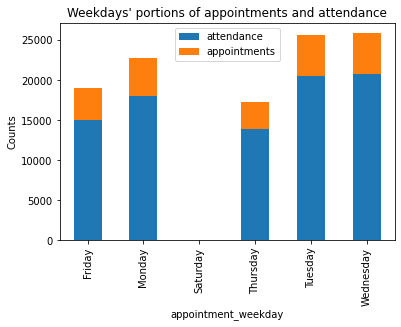

In [61]:
days=["appointment_weekday"]

fig = plt.figure(figsize=(16, 16))
for i, day in enumerate(days):

    df.groupby([day, 'no_show'])[day].count().unstack('no_show').plot( kind='bar',title="Weekdays' portions of appointments and attendance",ylabel="Counts", stacked=True).legend(('attendance', 'appointments'))

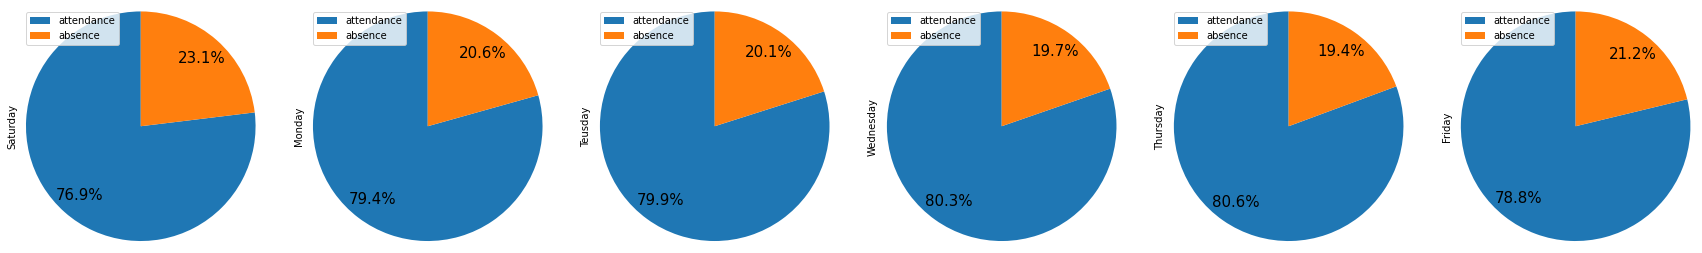

In [62]:
df_pie = pd.DataFrame({'attendance':[sat_att,mon_att,tue_att,wed_att,thr_att,fri_att],
'absence':[(sat_app-sat_att),(mon_app-mon_att),(tue_app-tue_att),(wed_app-wed_att),(thr_app-thr_att),(fri_app-fri_att)]}, index=['Saturday','Monday','Teusday','Wednesday','Thursday','Friday'])

df_pie.T.plot.pie(subplots=True, figsize=(30, 20),  autopct='%.1f%%',  labeldistance=None,startangle=90 ,fontsize=15,pctdistance=0.8, radius=1.2);


extracting the number of attendants for each day and the ratio out of their appointments, 

showing the percentages of attendance and absence for each day, and plotting the ratios on a pie for each day.

### Q5:  Is the attendance affected by the neighbourhood of the hospital?

In [63]:
df.neighbourhood.nunique()

81

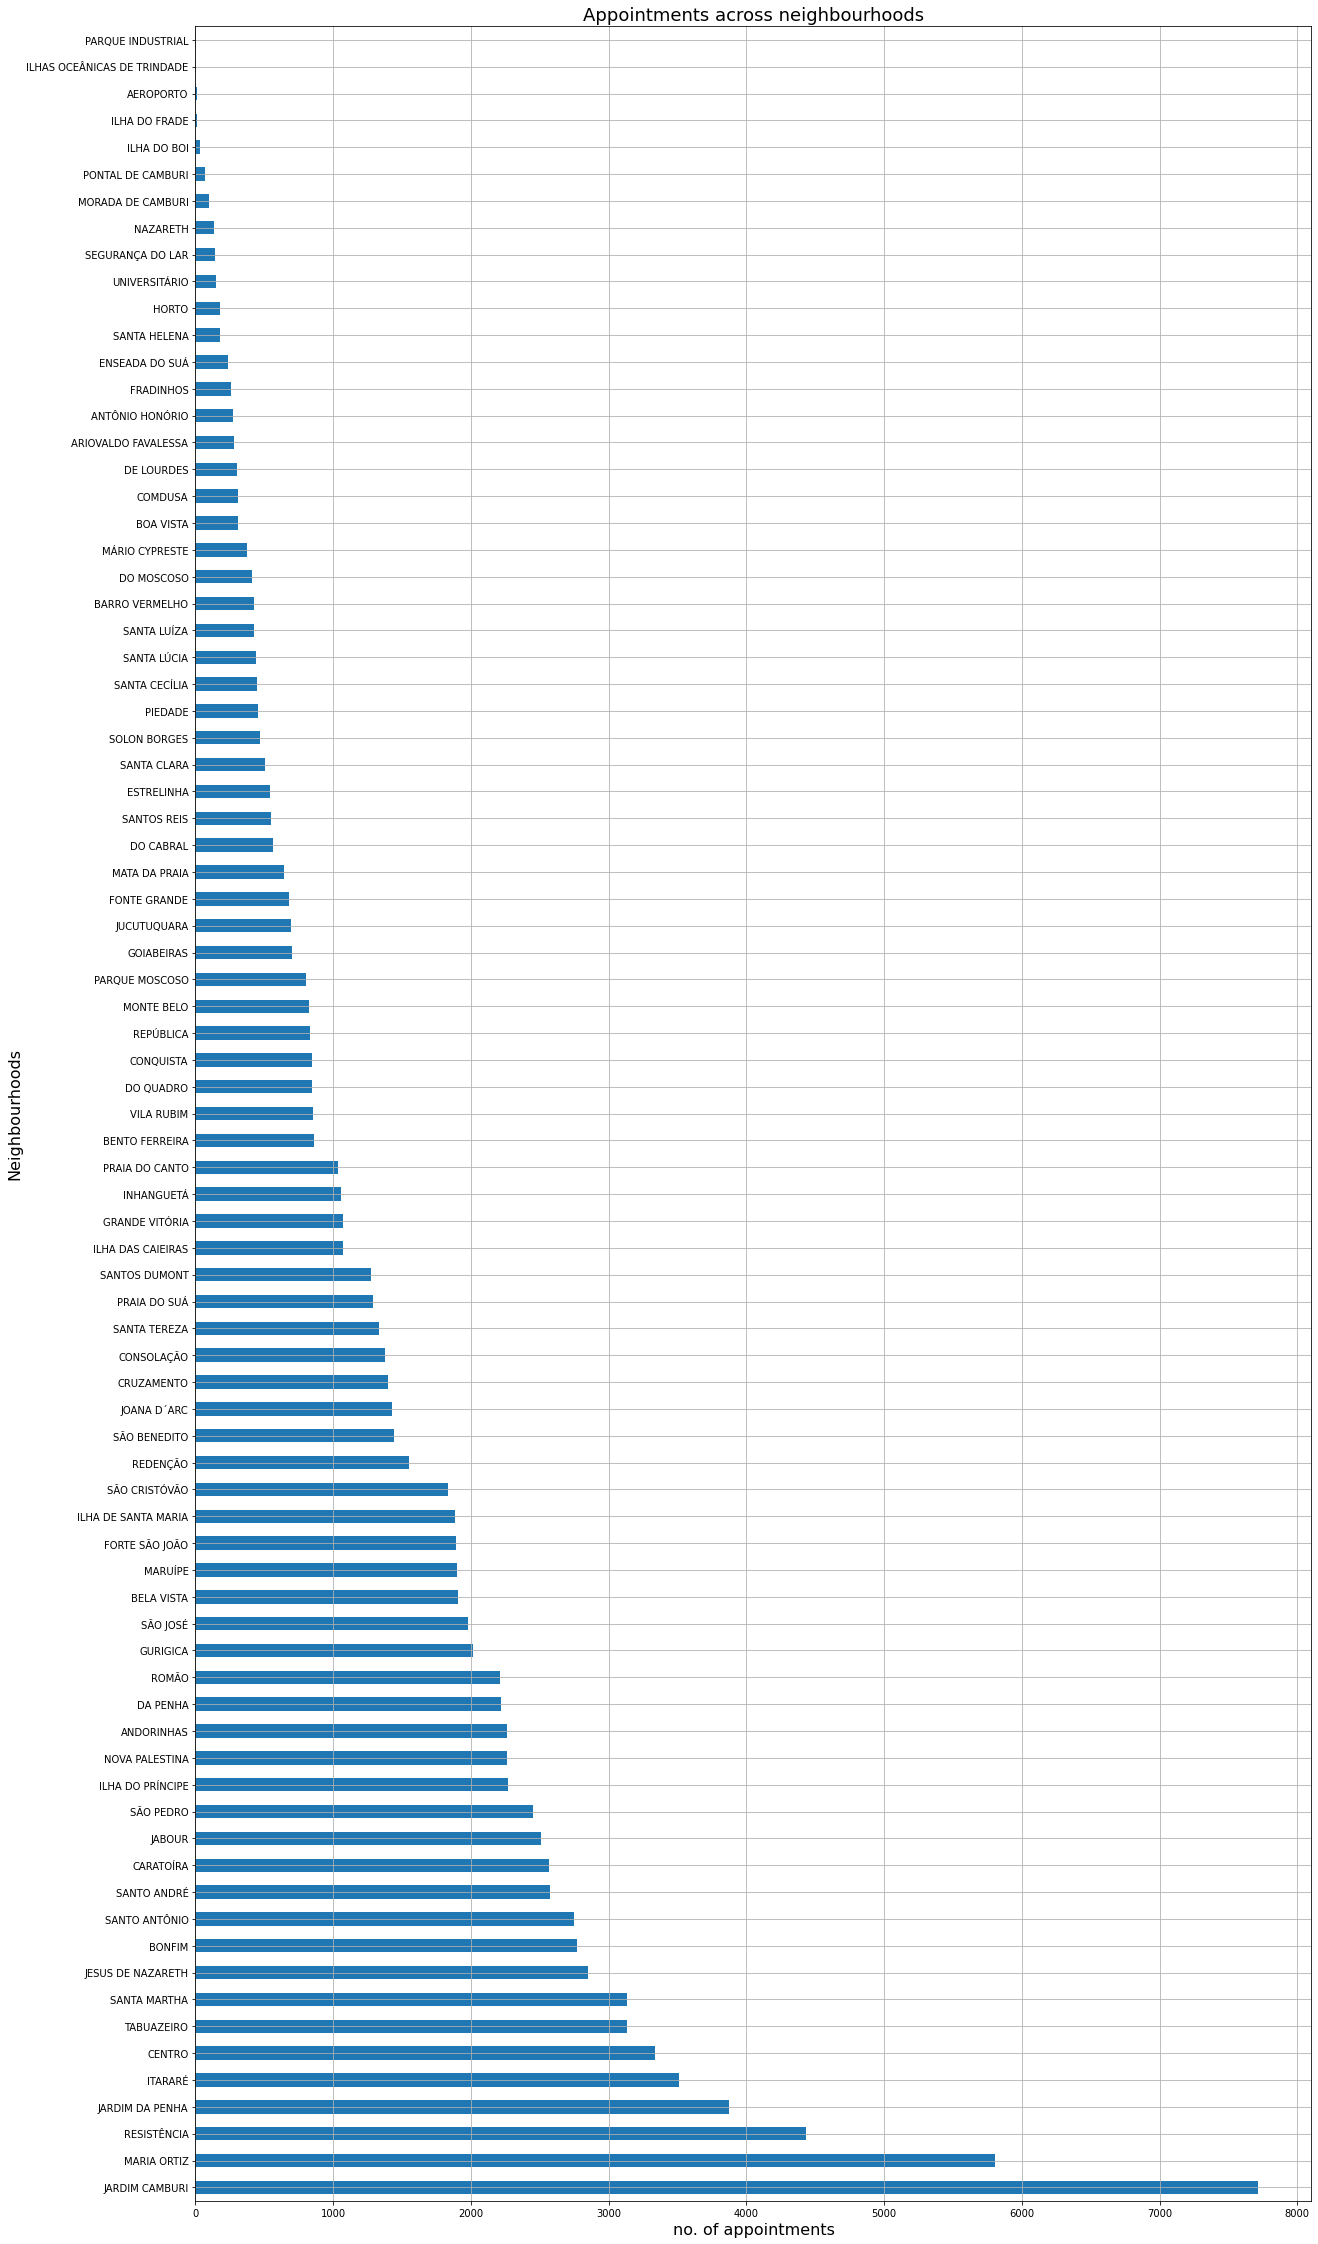

In [64]:
ax = df.neighbourhood.value_counts().plot(kind='barh',figsize=(20,40),)
ax.set_ylabel('Neighbourhoods',fontsize=16)
ax.set_xlabel('no. of appointments', fontsize=16)
ax.set_title('Appointments across neighbourhoods',fontsize=18)
plt.grid()
plt.savefig('Appointments across neighbourhoods.png')

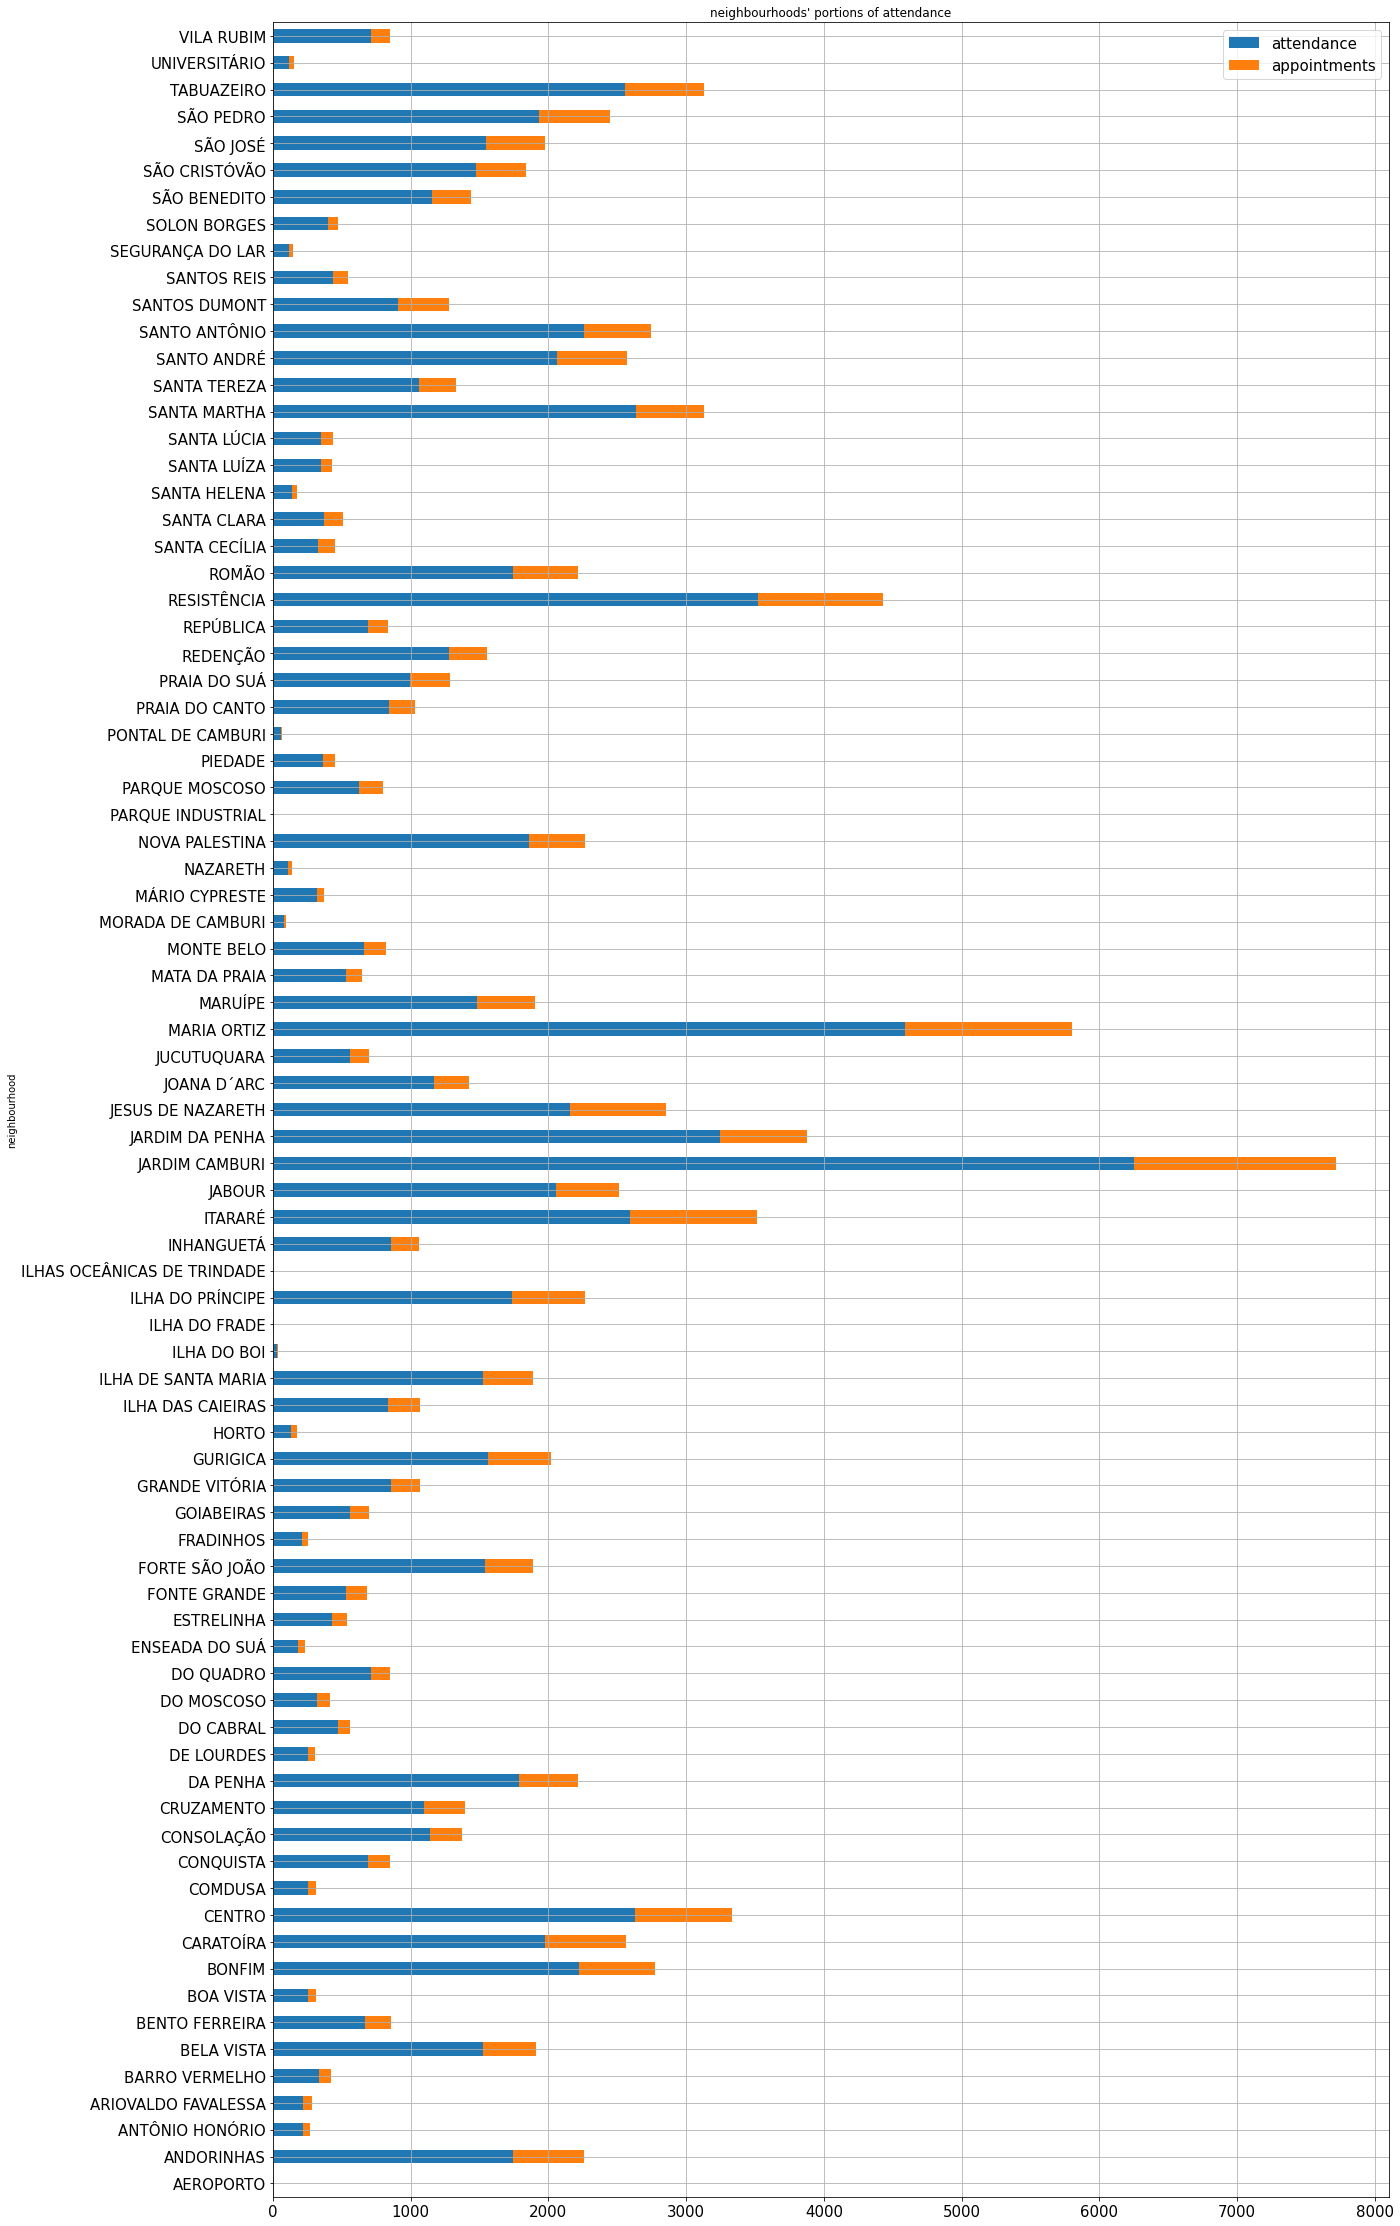

In [65]:
places=["neighbourhood"]


for i, place in enumerate(places):

    df.groupby([place, 'no_show'])[place].count().unstack('no_show').plot( grid=True,kind='barh',title="neighbourhoods' portions of attendance",figsize=(20, 40), stacked=True ,fontsize=15).legend(('attendance', 'appointments'),fontsize=15)

In [66]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [67]:
df.groupby('neighbourhood').no_show.value_counts()

neighbourhood    no_show
AEROPORTO        0             7
                 1             1
ANDORINHAS       0          1741
                 1           521
ANTÔNIO HONÓRIO  0           221
                            ... 
TABUAZEIRO       1           573
UNIVERSITÁRIO    0           120
                 1            32
VILA RUBIM       0           710
                 1           141
Name: no_show, Length: 160, dtype: int64

### Q6: How is the correlation between the patients' age and thier attendance?

In [68]:
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [69]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [70]:
age_sep=[0,5,18,37,55,75,115] 
catg=['0_5','5_18','18_37','37_55','55_75','75_115']
df['age_intervals']=pd.cut(df.age,age_sep,labels=catg)
df.age_intervals.value_counts()

18_37     27250
37_55     26906
55_75     22112
5_18      17135
0_5        8192
75_115     5392
Name: age_intervals, dtype: int64

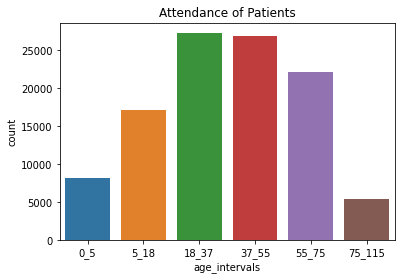

In [71]:
counting(df,"age_intervals")

In [72]:
kids_app= len(df[df.age_intervals=="0_5"])
child_app= len(df[df.age_intervals=="5_18"])
youth_app= len(df[df.age_intervals=="18_37"])
adult_app= len(df[df.age_intervals=="37_55"])
old_app= len(df[df.age_intervals=="55_75"])
grand_app= len(df[df.age_intervals=="75_115"])

kids_ratio=kids_app/appointments*100
child_ratio=child_app/appointments*100
youth_ratio=youth_app/appointments*100
adult_ratio=adult_app/appointments*100
old_ratio=old_app/appointments*100
grand_ratio=grand_app/appointments*100


print("Patients of age (0-5)yrs has {} appointments, with {}% of appointments,\nPatients of age (5-18)yrs has {} appointments, with {}% of appointments,\nPatients of age (18-37)yrs has {} appointments, with {}% of appointments,\nPatients of age (37-55)yrs has {} appointments, with {}% of appointments,\nPatients of age (55-75)yrs has {} appointments, with {}% of appointments,\nPatients of age (75-115)yrs has {} appointments, with {}% of appointments."
     .format(kids_app,kids_ratio,child_app,child_ratio,youth_app,youth_ratio,adult_app,adult_ratio,old_app,old_ratio,grand_app,grand_ratio))

Patients of age (0-5)yrs has 8192 appointments, with 7.411830700468667% of appointments,
Patients of age (5-18)yrs has 17135 appointments, with 15.503139532779617% of appointments,
Patients of age (18-37)yrs has 27250 appointments, with 24.65483234714004% of appointments,
Patients of age (37-55)yrs has 26906 appointments, with 24.343593362647702% of appointments,
Patients of age (55-75)yrs has 22112 appointments, with 20.006152398530663% of appointments,
Patients of age (75-115)yrs has 5392 appointments, with 4.878490129019417% of appointments.


kids_app: no. of Patients of age (0-5)yrs

child_app: no. of Patients of age (5-18)yrs

youth_app: no. of Patients of age (18-37)yrs

adult_app: no. of Patients of age (37-55)yrs

old_app: no. of Patients of age (55-75)yrs

grand_app: no. of Patients of age (75-115)yrs

kids_ratio: percentage of Patients of age (0-5)yrs out of the whole appointments.

child_ratio: percentage of Patients of age (5-18)yrs out of the whole appointments.

youth_ratio: percentage of Patients of age (18-37)yrs out of the whole appointments.

adult_ratio: percentage of Patients of age (37-55)yrs out of the whole appointments.

old_ratio: percentage of Patients of age (55-75)yrs out of the whole appointments.

grand_ratio: percentage of Patients of age (75-115)yrs out of the whole appointments.

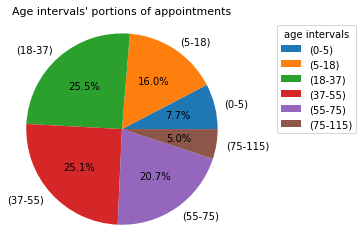

In [73]:
plt.pie([kids_ratio,child_ratio,youth_ratio,adult_ratio,old_ratio,grand_ratio],labels=['(0-5)', '(5-18)', '(18-37)', '(37-55)', '(55-75)', '(75-115)'],startangle=0,autopct='%1.1f%%', radius=1.1)
plt.title("Age intervals' portions of appointments", fontsize=11)
plt.legend( title="age intervals",loc="upper right",bbox_to_anchor =(1, 0, 0.6, 1))
plt.show()

firstly, we distribute the ages into intervals, then we get the portion of appointments for each age interval,

then we get the ratios for each interval, also we plot the portions on bar chart and the ratios on the pie chart.

In [74]:
df.groupby('age_intervals')['no_show'].value_counts()

age_intervals  no_show
0_5            0           6646
               1           1546
5_18           0          12973
               1           4162
18_37          0          20836
               1           6414
37_55          0          21651
               1           5255
55_75          0          18679
               1           3433
75_115         0           4522
               1            870
Name: no_show, dtype: int64

In [75]:
kids_att=len(df.query('age_intervals == "0_5" and no_show == 0'))
child_att=len(df.query('age_intervals == "5_18" and no_show == 0'))
youth_att=len(df.query('age_intervals == "18_37" and no_show == 0'))
adult_att=len(df.query('age_intervals == "37_55" and no_show == 0'))
old_att=len(df.query('age_intervals== "55_75" and no_show == 0'))
grand_att=len(df.query('age_intervals == "75_115" and no_show == 0'))


kids_att_ratio= kids_att/kids_app*100
child_att_ratio= child_att/child_app*100
youth_att_ratio= youth_att/youth_app*100
adult_att_ratio= adult_att/adult_app*100
old_att_ratio= old_att/old_app*100
grand_att_ratio= grand_att/grand_app*100

print("The attending patients of age (0-5)yrs are {}, with attending ratio= {}%\nThe attending patients of age (5-18)yrs are {}, with attending ratio= {}%\nThe attending patients of age (18-37)yrs are {}, with attending ratio= {}%\nThe attending patients of age (37-55)yrs are {}, with attending ratio= {}%\nThe attending patients of age (55-75)yrs are {}, with attending ratio= {}%\nThe attending patients of age (75-115)yrs are {}, with attending ratio= {}%"
     .format(kids_att,kids_att_ratio,child_att,child_att_ratio,youth_att,youth_att_ratio,adult_att,adult_att_ratio,old_att,old_att_ratio,grand_att,grand_att_ratio))

The attending patients of age (0-5)yrs are 6646, with attending ratio= 81.1279296875%
The attending patients of age (5-18)yrs are 12973, with attending ratio= 75.71053399474759%
The attending patients of age (18-37)yrs are 20836, with attending ratio= 76.46238532110091%
The attending patients of age (37-55)yrs are 21651, with attending ratio= 80.46904036274437%
The attending patients of age (55-75)yrs are 18679, with attending ratio= 84.474493487699%
The attending patients of age (75-115)yrs are 4522, with attending ratio= 83.86498516320475%


kids_att: no. of The attending patients of age (0-5)yrs for their appointments.

child_att: no. of The attending patients of age (5-18)yrs for their appointments.

youth_att: no. of The attending patients of age (18-37)yrs for their appointments.

adult_att: no. of The attending patients of age (37-55)yrs for their appointments.

old_att: no. of The attending patients of age (55-75)yrs for their appointments.

grand_att: no. of The attending patients of age (75-115)yrs for their appointments.


kids_att_ratio: percentage of The attending patients of age (0-5)yrs out of their appointments.

child_att_ratio: percentage of The attending patients of age (5-18)yrs out of their appointments.

youth_att_ratio: percentage of The attending patients of age (18-37)yrs out of their appointments.

adult_att_ratio: percentage of The attending patients of age (37-55)yrs out of their appointments.

old_att_ratio: percentage of The attending patients of age (55-75)yrs out of their appointments.

grand_att_ratio: percentage of The attending patients of age (75-115)yrs out of their appointments.

<Figure size 1152x1152 with 0 Axes>

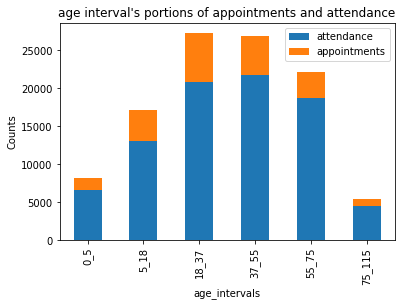

In [76]:
intervals=["age_intervals"]

fig = plt.figure(figsize=(16, 16))
for i, interval in enumerate(intervals):

    df.groupby([interval, 'no_show'])[interval].count().unstack('no_show').plot( kind='bar',ylabel="Counts", title="age interval's portions of appointments and attendance", stacked=True).legend(('attendance', 'appointments'))

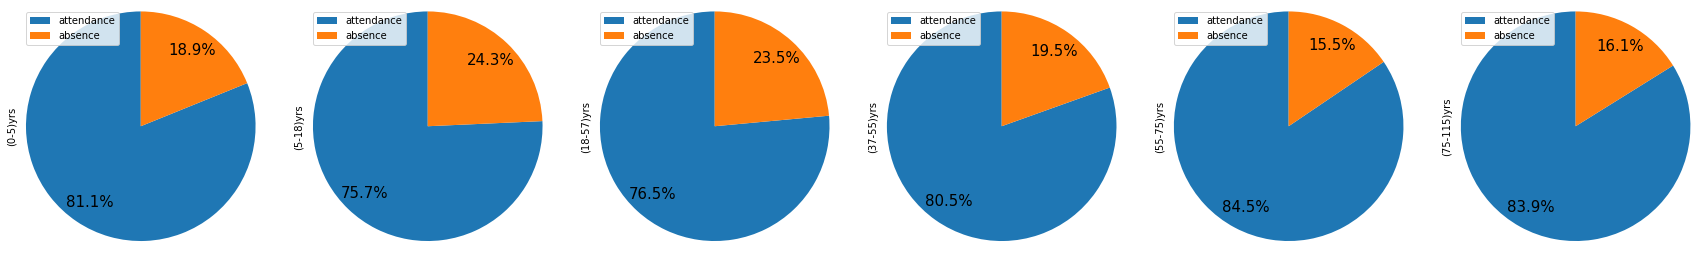

In [77]:
df_pie = pd.DataFrame({'attendance':[kids_att,child_att,youth_att,adult_att,old_att,grand_att],
                   'absence':[(kids_app-kids_att),(child_app-child_att),(youth_app-youth_att),(adult_app-adult_att),(old_app-old_att),(grand_app-grand_att)]}, index=['(0-5)yrs','(5-18)yrs','(18-57)yrs','(37-55)yrs','(55-75)yrs','(75-115)yrs'])


df_pie.T.plot.pie(subplots=True, figsize=(30, 20),  autopct='%.1f%%',  labeldistance=None,startangle=90 ,fontsize=15,pctdistance=0.8, radius=1.2);


WE have extracted the numbers of appointments attended for each interval and also the ratio of attendace in each interval,

then we plot the ratios of each interval on a pie chart.

### Q7:  Can the attendance of the Appointments get affected by the diseases of the patients?


In [78]:
df.appointment_lead_days.value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
82         1
127        1
126        1
151        1
123        1
Name: appointment_lead_days, Length: 131, dtype: int64

In [79]:
df.appointment_lead_days.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: appointment_lead_days, dtype: float64

In [80]:
day_sep=[0,1,7,15,30,90,180] 
catg=['same_day','withen_week','withen_2_week','withen_month','withen_3_month','withen_6_month']
df['lead_intervals']=pd.cut(df.appointment_lead_days,day_sep,labels=catg)
df.lead_intervals.value_counts()

withen_week       26972
withen_month      15868
withen_2_week     13528
withen_3_month    10161
same_day           5213
withen_6_month      217
Name: lead_intervals, dtype: int64

''

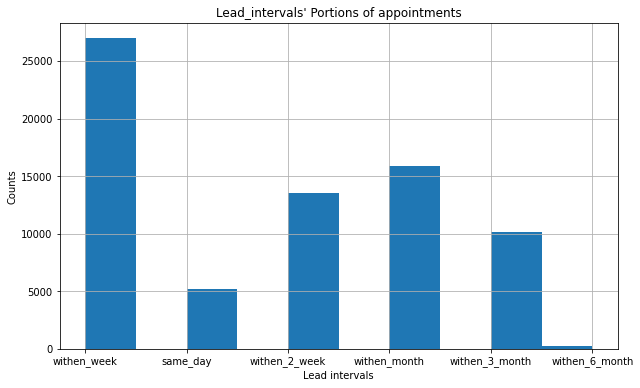

In [81]:
df.lead_intervals.hist(figsize=(10,6))
plt.title("Lead_intervals' Portions of appointments")
plt.xlabel("Lead intervals")
plt.ylabel("Counts")
;

In [82]:
same_day_app=len(df[df.lead_intervals=="same_day"])
withen_week_app=len(df[df.lead_intervals=="withen_week"])
withen_2_week_app=len(df[df.lead_intervals=="withen_2_week"])
withen_month_app=len(df[df.lead_intervals=="withen_month"])
withen_3_month_app=len(df[df.lead_intervals=="withen_3_month"])
withen_6_month_app=len(df[df.lead_intervals=="withen_6_month"])

same_day_ratio=same_day_app/appointments*100
week_ratio=withen_week_app/appointments*100
week_2_ratio=withen_2_week_app/appointments*100
month_ratio=withen_month_app/appointments*100
month_3_ratio=withen_3_month_app/appointments*100
month_6_ratio=withen_6_month_app/appointments*100


print("Appointments scheduled at the same day are {} appointments, with {}% of appointments,\nAppointments scheduled withen a week are {} appointments, with {}% of appointments,\nAppointments scheduled withen 2 weeks are {} appointments, with {}% of appointments,\nAppointments scheduled withen a month are {} appointments, with {}% of appointments,\nAppointments scheduled withen 3 months are {} appointments, with {}% of appointments,\nAppointments scheduled withen 6 months are {} appointments, with {}% of appointments."
     .format(same_day_app,same_day_ratio,withen_week_app,week_ratio,withen_2_week_app,week_2_ratio,withen_month_app,month_ratio,withen_3_month_app,month_3_ratio,withen_6_month_app,month_6_ratio))

Appointments scheduled at the same day are 5213 appointments, with 4.716537285344625% of appointments,
Appointments scheduled withen a week are 26972 appointments, with 24.40330781897472% of appointments,
Appointments scheduled withen 2 weeks are 13528 appointments, with 12.2396540180591% of appointments,
Appointments scheduled withen a month are 15868 appointments, with 14.356802924198831% of appointments,
Appointments scheduled withen 3 months are 10161 appointments, with 9.193311980891373% of appointments,
Appointments scheduled withen 6 months are 217 appointments, with 0.19633389428731698% of appointments.


same_day_app: no. of Appointments scheduled at the same day.

withen_week_app: no. of Appointments scheduled withen a week.

withen_2_week_app: no. of Appointments scheduled withen 2 weeks.

withen_month_app: no. of Appointments scheduled withen a month.

withen_3_month_app: no. of Appointments scheduled withen 3 months.

withen_6_month_app: no. of Appointments scheduled withen 6 months.

same_day_ratio: percentage of the of Appointments scheduled at the same day out of the whole aappointments.

week_ratio: percentage of Appointments scheduled withen a week out of the whole appointments.

week_2_ratio: percentage of Appointments scheduled withen 2 weeks out of the whole appointments.

month_ratio: percentage of Appointments scheduled withen a month out of the whole appointments.

month_3_ratio: percentage of Appointments scheduled withen 3 months out of the whole appointments.

month_6_ratio: percentage of Appointments scheduled withen 6 months out of the whole appointments.

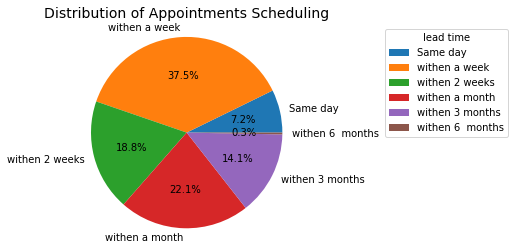

In [83]:
plt.pie([same_day_ratio,week_ratio,week_2_ratio,month_ratio,month_3_ratio,month_6_ratio],labels=['Same day', 'withen a week', 'withen 2 weeks', 'withen a month', 'withen 3 months', 'withen 6  months'],startangle=0,autopct='%1.1f%%', radius=1.1)
plt.title("Distribution of Appointments Scheduling", fontsize=14)
plt.legend( title="lead time",loc="upper right",bbox_to_anchor =(1, 0, 1, 1))
plt.show()

Again we needed to distribute the lead time into intervals, then we get the portion of each lead_time interval, and it's ratio out of the whole appointments,

and then it's all plotted on the bar chart and the pie chart.

In [84]:
df.groupby('lead_intervals')['no_show'].value_counts()

lead_intervals  no_show
same_day        0           4100
                1           1113
withen_week     0          20313
                1           6659
withen_2_week   0           9362
                1           4166
withen_month    0          10709
                1           5159
withen_3_month  0           6792
                1           3369
withen_6_month  0            161
                1             56
Name: no_show, dtype: int64

In [85]:
same_att=len(df.query('lead_intervals == "same_day" and no_show == 0'))
week_att=len(df.query('lead_intervals == "withen_week" and no_show == 0'))
week_2_att=len(df.query('lead_intervals == "withen_2_week" and no_show == 0'))
month_att=len(df.query('lead_intervals == "withen_month" and no_show == 0'))
month_3_att=len(df.query('lead_intervals== "withen_3_month" and no_show == 0'))
month_6_att=len(df.query('lead_intervals == "withen_6_month" and no_show == 0'))


same_att_ratio= same_att/same_day_app*100
week_att_ratio= week_att/withen_week_app*100
week_2_att_ratio= week_2_att/withen_2_week_app*100
month_att_ratio= month_att/withen_month_app*100
month_3_att_ratio= month_3_att/withen_3_month_app*100
month_6_att_ratio= month_6_att/withen_6_month_app*100

print("The attending patients of apointments scheduled at the same day are {}, with attending ratio= {}%\nThe attending patients of apointments scheduled withen a week are {}, with attending ratio= {}%\nThe attending patients of apointments scheduled withen 2 weeks are {}, with attending ratio= {}%\nThe attending patients of apointments scheduled withen a month are {}, with attending ratio= {}%\nThe attending patients of apointments scheduled withen 3 months are {}, with attending ratio= {}%\nThe attending patients of apointments scheduled withen 6 months are {}, with attending ratio= {}%"
     .format(same_att,same_att_ratio,week_att,week_att_ratio,week_2_att,week_2_att_ratio,month_att,month_att_ratio,month_3_att,month_3_att_ratio,month_6_att,month_6_att_ratio))

The attending patients of apointments scheduled at the same day are 4100, with attending ratio= 78.64953002110109%
The attending patients of apointments scheduled withen a week are 20313, with attending ratio= 75.31143407978644%
The attending patients of apointments scheduled withen 2 weeks are 9362, with attending ratio= 69.20461265523359%
The attending patients of apointments scheduled withen a month are 10709, with attending ratio= 67.48802621628435%
The attending patients of apointments scheduled withen 3 months are 6792, with attending ratio= 66.84381458517863%
The attending patients of apointments scheduled withen 6 months are 161, with attending ratio= 74.19354838709677%


same_att: no. of The attending patients of apointments scheduled at the same day

week_att: no. of The attending patients of apointments scheduled withen a week

week_2_att: no. of The attending patients of apointments scheduled withen 2 weeks

month_att: no. of The attending patients of apointments scheduled withen a month

month_3_att: no. of The attending patients of apointments scheduled withen 3 months 

month_6_att: no. of The attending patients of apointments scheduled withen 6 months


same_att_ratio: percentage of the attended appointments scheduled at the same day out of the scheduled appointments

week_att_ratio: percentage of the attended appointments scheduled withen a week out of the scheduled appointments

week_2_att_ratio: percentage of the attended appointments scheduled withen 2 weeks out of the scheduled appointments

month_att_ratio: percentage of the attended appointments scheduled withen a month out of the scheduled appointments

month_3_att_ratio: percentage of the attended appointments scheduled withen 3 months out of the scheduled appointments

month_6_att_ratio: percentage of the attended appointments apointments scheduled withen 6 months out of the scheduled appointments


<Figure size 1152x1152 with 0 Axes>

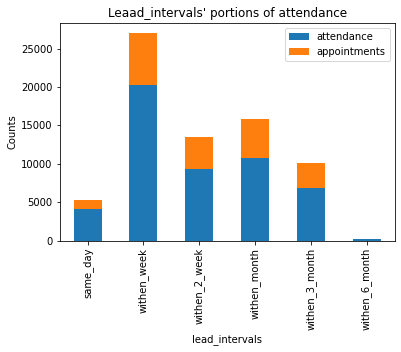

In [86]:
intervals=["lead_intervals"]

fig = plt.figure(figsize=(16, 16))
for i, interval in enumerate(intervals):

    df.groupby([interval, 'no_show'])[interval].count().unstack('no_show').plot( kind='bar',title="Leaad_intervals' portions of attendance", ylabel="Counts" ,stacked=True).legend(('attendance', 'appointments'));

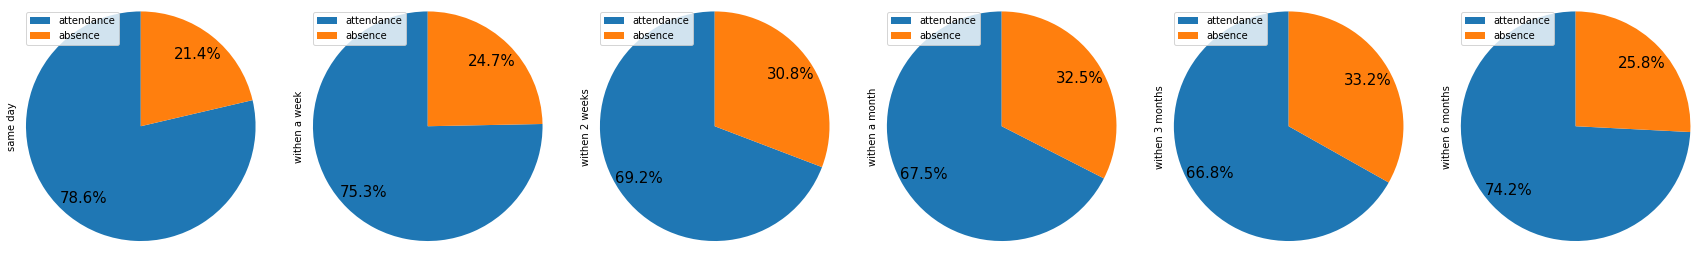

In [87]:
df_pie = pd.DataFrame({'attendance':[same_att,week_att,week_2_att,month_att,month_3_att,month_6_att],
                   'absence':[(same_day_app-same_att),(withen_week_app-week_att),(withen_2_week_app-week_2_att),(withen_month_app-month_att),(withen_3_month_app-month_3_att),(withen_6_month_app-month_6_att)]}, index=['same day','withen a week','withen 2 weeks','withen a month','withen 3 months','withen 6 months'])


df_pie.T.plot.pie(subplots=True, figsize=(30, 20),  autopct='%.1f%%',  labeldistance=None,startangle=90 ,fontsize=15,pctdistance=0.8, radius=1.2);


we get the numer of the attendants in each interval and the attendance ratio for each interval,

it's plotted on bar chart and each interval has it's pie chart showing the percentange of attendance and the percentage of the absence

### Q7: Can the attendance of the Appointments get affected by the diseases of the patients?


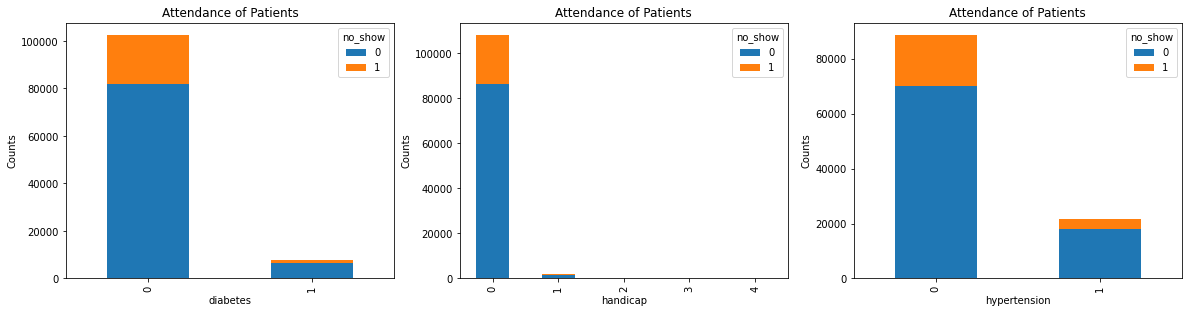

In [88]:
diseases = ['diabetes', 'handicap','hypertension']

fig = plt.figure(figsize=(20, 16))
for i, disease in enumerate(diseases):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([disease, 'no_show'])[disease].count().unstack('no_show').plot(ax=ax, kind='bar',ylabel="Counts",title='Attendance of Patients' ,stacked=True)

general overview for the portions of appointments for each disease

#### Daibetes

In [89]:
df.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

In [90]:
df.diabetes.describe()

count    110526.000000
mean          0.071865
std           0.258266
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64

In [91]:
diab=len(df[df['diabetes']==1])
no_diab=len(df[df['diabetes']==0])

diab_ratio = diab/appointments*100
no_diab_ratio=no_diab/appointments*100

print("The Appointments for patients with diabetes= {}, with percentage={}% of the whole appointments,\nWhile the appointments for patients without diabetes={}, with percentaage= {}% out of the whole appoitments."
      .format(diab,diab_ratio,no_diab,no_diab_ratio))

The Appointments for patients with diabetes= 7943, with percentage=7.186544342507645% of the whole appointments,
While the appointments for patients without diabetes=102583, with percentaage= 92.81345565749236% out of the whole appoitments.


diab: no. of appointments for diabetic patients.

no_diab: no. of appointments for non diabetic patients.

diab_ratio: ratio of appointments for diabetic patients out of the whole appointments.

no_diab_ratio: ratio of appointments for non diabetic patients out of the whole appointments.

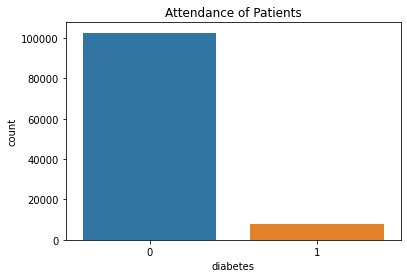

In [92]:
counting(df,"diabetes")

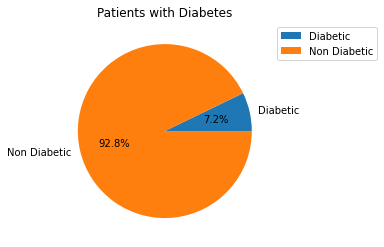

In [93]:
plt.pie([diab_ratio,no_diab_ratio],labels=["Diabetic","Non Diabetic"], startangle=0, autopct='%1.1f%%')
plt.title("Patients with Diabetes")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

we calculted the number of diabetic patients and their portion out of the appointments,

plotting the ratios on a pie chart.

In [94]:
df.groupby('diabetes')['no_show'].value_counts()


diabetes  no_show
0         0          81694
          1          20889
1         0           6513
          1           1430
Name: no_show, dtype: int64

In [95]:
diab_att=len(df.query('diabetes == 1 and no_show == 0'))
diab_abs=len(df.query('diabetes == 1 and no_show == 1'))
no_diab_att=len(df.query('diabetes == 0 and no_show == 0'))
no_diab_abs=len(df.query('diabetes == 0 and no_show == 1'))

diab_att_ratio= diab_att/diab*100
no_diab_att_ratio= no_diab_att/no_diab*100

print("No. of attending patients who have diabetes is: {} out of {} patients, with ratio= {}% out of their scheduled appointments.\nNo. of attending non-diabetic patients is: {} out of {} patients,  with ratio= {}% out of their scheduled appointments."
      .format(diab_att, diab ,diab_att_ratio, no_diab_att,no_diab, no_diab_att_ratio))

No. of attending patients who have diabetes is: 6513 out of 7943 patients, with ratio= 81.99672667757774% out of their scheduled appointments.
No. of attending non-diabetic patients is: 81694 out of 102583 patients,  with ratio= 79.63697688700857% out of their scheduled appointments.


diab_att: No. of the attended appointments for diabetic patients

diab_abs: No. of the missed appointments for diabetic patients

no_diab_att: No. of the attended appointments for non diabetic patients 

no_diab_abs: No. of the missed appointments for non diabetic patients

diab_att_ratio: percentage of attendance of diabetic patients for their scheduled appointments

no_diab_att_ratio: percentage of attendance of non diabetic patients for their scheduled appointments

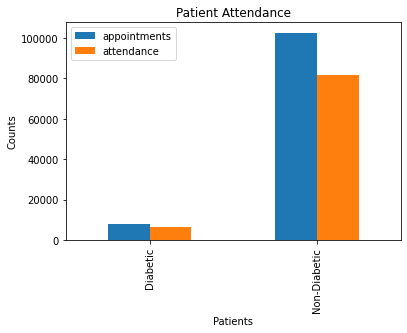

In [96]:
df_bar = pd.DataFrame([['Diabetic',diab,diab_att], ['Non-Diabetic', no_diab, no_diab_att]],
                  columns=['Patients', 'appointments', 'attendance'])

df_bar.plot(x='Patients',kind='bar', ylabel="Counts", stacked=False, title='Patient Attendance');

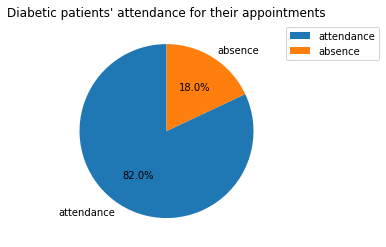

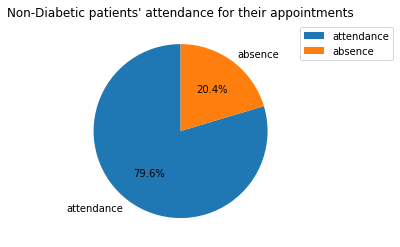

In [97]:
plt.pie([diab_att,(diab-diab_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Diabetic patients' attendance for their appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([no_diab_att,(no_diab-no_diab_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Non-Diabetic patients' attendance for their appointments")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


by calculating the number of attendants of the diabetic patients and then the ratio of attendance to thier whole appointments,

then plotting the data on charts.

#### Hypertension

In [98]:
df.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [99]:
hyp=len(df[df['hypertension']==1])
no_hyp=len(df[df['hypertension']==0])

hyp_ratio = hyp/appointments*100
no_hyp_ratio=no_hyp/appointments*100

print("The Appointments for patients with Hypertension= {}, with percentage={}% of the whole appointments,\nWhile the appointments for patients without Hypertension={}, with percentaage= {}% out of the whole appoitments."
      .format(hyp,hyp_ratio,no_hyp,no_hyp_ratio))

The Appointments for patients with Hypertension= 21801, with percentage=19.724770642201836% of the whole appointments,
While the appointments for patients without Hypertension=88725, with percentaage= 80.27522935779817% out of the whole appoitments.


hyp: no. of The Appointments for patients with Hypertension.

no_hyp: no. of The Appointments for patients with no Hypertension.

hyp_ratio: ratio of The Appointments for patients with Hypertension out of the whole appointments.

no_hyp_ratio: ratio of The Appointments for patients with no Hypertension out of the whole appointments.

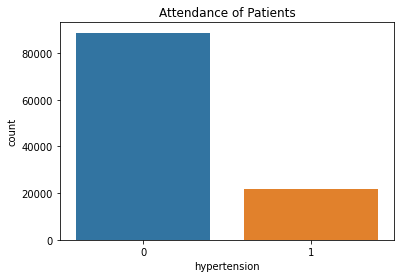

In [100]:
counting(df,"hypertension")

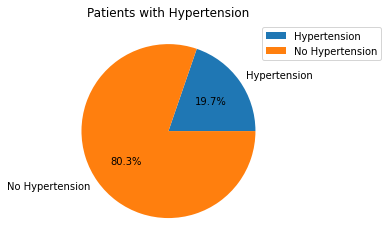

In [101]:
plt.pie([hyp_ratio,no_hyp_ratio],labels=["Hypertension","No Hypertension"], startangle=0, autopct='%1.1f%%')
plt.title("Patients with Hypertension")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

we calculted the number of patients suffering from Hypertension and their portion out of the appointments,

and then plotting the ratios on a pie chart.

In [102]:
df.groupby('hypertension')['no_show'].value_counts()


hypertension  no_show
0             0          70178
              1          18547
1             0          18029
              1           3772
Name: no_show, dtype: int64

In [103]:
hyp_att=len(df.query('hypertension == 1 and no_show == 0'))
hyp_abs=len(df.query('hypertension == 1 and no_show == 1'))
no_hyp_att=len(df.query('hypertension == 0 and no_show == 0'))
no_hyp_abs=len(df.query('hypertension == 0 and no_show == 1'))

hyp_att_ratio= hyp_att/hyp*100
no_hyp_att_ratio= no_hyp_att/no_hyp*100

print("No. of attending patients who have Hypertension is: {} out of {} patients, with ratio= {}% out of their scheduled appointments.\nNo. of attending patients with no Hypertension is: {} out of {} patients,  with ratio= {}% out of their scheduled appointments."
      .format(hyp_att, hyp ,hyp_att_ratio, no_hyp_att,no_hyp, no_hyp_att_ratio))

No. of attending patients who have Hypertension is: 18029 out of 21801 patients, with ratio= 82.69804137424889% out of their scheduled appointments.
No. of attending patients with no Hypertension is: 70178 out of 88725 patients,  with ratio= 79.09608340377571% out of their scheduled appointments.


hyp_att: no. of the attended appointments for patients with hypertension

hyp_abs: no. of the missed appointments for patients with hypertension

no_hyp_att: no. of the attended appointments for patients with no hypertension

no_hyp_abs: no. of the missed appointments for patients with no hypertension

hyp_att_ratio: percentage of the attended appointments for patients with hypertension out of their scheduled appointments.

no_hyp_att_ratio: percentage of the attended appointments for patients with no hypertension out of their scheduled appointments.

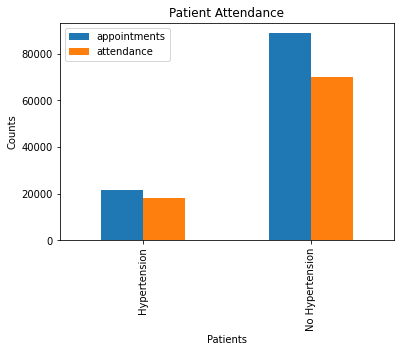

In [104]:
df_bar = pd.DataFrame([['Hypertension',hyp,hyp_att], ['No Hypertension', no_hyp, no_hyp_att]],
                  columns=['Patients', 'appointments', 'attendance'])

df_bar.plot(x='Patients',kind='bar',ylabel="Counts", stacked=False, title='Patient Attendance');

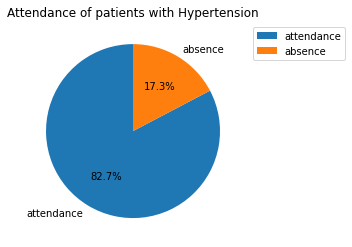

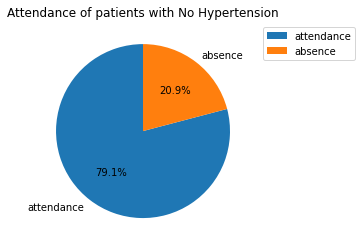

In [105]:
plt.pie([hyp_att,(hyp-hyp_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance of patients with Hypertension")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([no_hyp_att,(no_hyp-no_hyp_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance of patients with No Hypertension")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


Calculating the number of attendants of the Hypertension patients and then the ratio of attendance to thier whole appointments,

then plotting the data on charts.

 #### Handicaps

In [106]:
df.handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [107]:
hc=len(df[df['handicap']>=1])
no_hc=len(df[df['handicap']==0])

hc_ratio = hc/appointments*100
no_hc_ratio=no_hc/appointments*100

print("The Appointments for patients with Handicap= {}, with percentage={}% of the whole appointments,\nWhile the appointments for patients without Handicap={}, with percentaage= {}% out of the whole appoitments."
      .format(hc,hc_ratio,no_hc,no_hc_ratio))

The Appointments for patients with Handicap= 2241, with percentage=2.0275772216492047% of the whole appointments,
While the appointments for patients without Handicap=108285, with percentaage= 97.9724227783508% out of the whole appoitments.


hc: no. of The Appointments for patients with Handicap.

no_hc: no. of The Appointments for patients with no Handicap.

hc_ratio: percentage of The Appointments for patients with Handicap out of the whole appointments.

no_hc_ratio: percentage of The Appointments for patients with no Handicap out of the whole appointments.

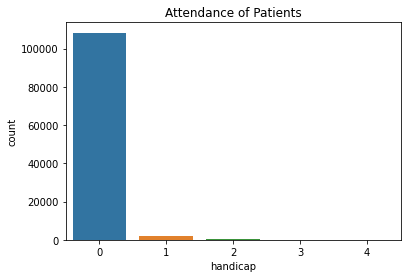

In [108]:
counting(df,"handicap")

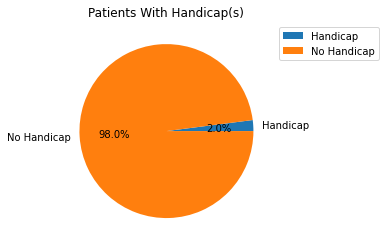

In [109]:
plt.pie([hc_ratio,no_hc_ratio],labels=["Handicap","No Handicap"], startangle=0, autopct='%1.1f%%')
plt.title("Patients With Handicap(s)")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

we calculted the number of patients suffering with Handicaps and their portion out of the appointments,

and then plotting the ratios on a pie chart.

In [110]:
df.groupby('handicap')['no_show'].value_counts()


handicap  no_show
0         0          86373
          1          21912
1         0           1676
          1            366
2         0            146
          1             37
3         0             10
          1              3
4         0              2
          1              1
Name: no_show, dtype: int64

In [111]:
hc_att=len(df.query('handicap >= 1 and no_show == 0'))
hc_abs=len(df.query('handicap >= 1 and no_show == 1'))
no_hc_att=len(df.query('handicap == 0 and no_show == 0'))
no_hc_abs=len(df.query('handicap == 0 and no_show == 1'))

hc_att_ratio= hc_att/hc*100
no_hc_att_ratio= no_hc_att/no_hc*100

print("No. of attending patients with Handicap(s) is: {} out of {} patients, with ratio= {}% out of their scheduled appointments.\nNo. of attending patients without Handicaps is: {} out of {} patients,  with ratio= {}% out of their scheduled appointments."
      .format(hc_att, hc ,hc_att_ratio, no_hc_att,no_hc, no_hc_att_ratio))

No. of attending patients with Handicap(s) is: 1834 out of 2241 patients, with ratio= 81.83846497099509% out of their scheduled appointments.
No. of attending patients without Handicaps is: 86373 out of 108285 patients,  with ratio= 79.76451031998891% out of their scheduled appointments.


hc_att: no. of the attended appointments for patients with handicap.

hc_abs: no. of the missed appointments for patients with handicap.

no_hc_att: no. of the attended appointments for patients with no handicap.

no_hc_abs: no. of the missed appointments for patients with no handicp.

hc_att_ratio: ratio of the attended appointments for patients with handicap

no_hc_att_ratio: ratio of the attended appointments for patients with no handicap.

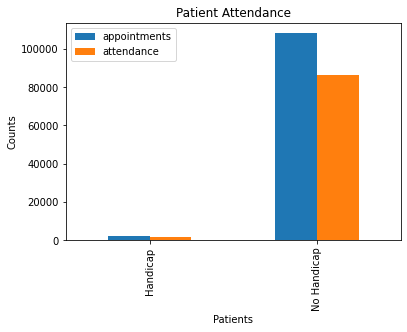

In [112]:
df_bar = pd.DataFrame([['Handicap',hc,hc_att], ['No Handicap', no_hc, no_hc_att]],
                  columns=['Patients', 'appointments', 'attendance'])

df_bar.plot(x='Patients',kind='bar',ylabel="Counts", stacked=False, title='Patient Attendance');

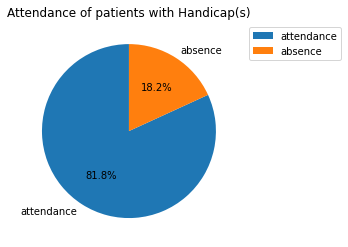

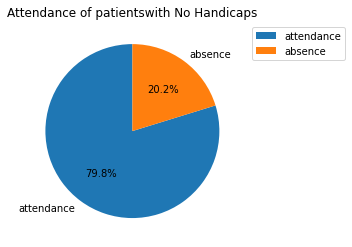

In [113]:
plt.pie([hc_att,(hc-hc_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance of patients with Handicap(s)")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([no_hc_att,(no_hc-no_hc_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance of patientswith No Handicaps")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


Calculating the number of attendants of the Handicapped patients and then the ratio of attendance to thier whole appointments,

then plotting the data on charts.

### Q8: Is there a direct relation between Alcoholism and the attendence of the appointments?

In [114]:
df.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [115]:
alc=len(df[df['alcoholism']==1])
no_alc=len(df[df['alcoholism']==0])

alc_ratio = alc/appointments*100
no_alc_ratio=no_alc/appointments*100

print("The Appointments for patients with Alcoholism= {}, with percentage={}% of the whole appointments,\nWhile the appointments for patients without Alcoholism={}, with percentaage= {}% out of the whole appoitments."
      .format(alc,alc_ratio,no_alc,no_alc_ratio))

The Appointments for patients with Alcoholism= 3360, with percentage=3.040008685739102% of the whole appointments,
While the appointments for patients without Alcoholism=107166, with percentaage= 96.95999131426089% out of the whole appoitments.


alc: no. of appointments for patients drink alcoholics.

no_alc: no. of appointments for patients don't drink alcoholics.

alc_ratio: ratio of the appointments for alcoholic drinkers out of the whole appointments.

no_alc_ratio: ratio of the appointments for the patients don't drin alcoholics out of the whole appointments.

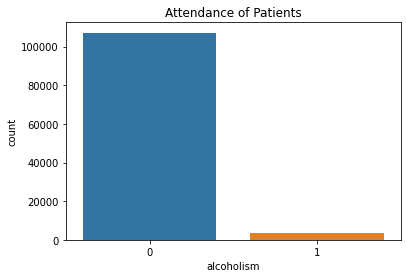

In [116]:
counting(df,"alcoholism")

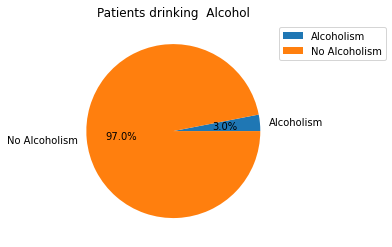

In [117]:
plt.pie([alc_ratio,no_alc_ratio],labels=["Alcoholism","No Alcoholism"], startangle=0, autopct='%1.1f%%')
plt.title("Patients drinking  Alcohol")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

we calculated the number of patient drinking alcoholics and thier percentage out of the whole appointments,

and then it's plotted on charts.

In [118]:
df.groupby('alcoholism')['no_show'].value_counts()


alcoholism  no_show
0           0          85524
            1          21642
1           0           2683
            1            677
Name: no_show, dtype: int64

In [119]:
alc_att=len(df.query('alcoholism == 1 and no_show == 0'))
alc_abs=len(df.query('alcoholism == 1 and no_show == 1'))
no_alc_att=len(df.query('alcoholism == 0 and no_show == 0'))
no_alc_abs=len(df.query('alcoholism == 0 and no_show == 1'))

alc_att_ratio= alc_att/alc*100
no_alc_att_ratio= no_alc_att/no_alc*100

print("No. of attending patients who Drink Alcohol is: {} out of {} patients, with ratio= {}% out of their scheduled appointments.\nNo. of attending patients who don't drink Alcohols is: {} out of {} patients,  with ratio= {}% out of their scheduled appointments."
      .format(alc_att, alc ,alc_att_ratio, no_alc_att,no_alc, no_alc_att_ratio))

No. of attending patients who Drink Alcohol is: 2683 out of 3360 patients, with ratio= 79.85119047619048% out of their scheduled appointments.
No. of attending patients who don't drink Alcohols is: 85524 out of 107166 patients,  with ratio= 79.80516208498965% out of their scheduled appointments.


alc_att: no. of the attended appointments for alcohlic drinkers.

alc_abs: no. of missed appointments for alcoholic drinkers.

no_alc_att: no. of the attended appointments for patients don't drink alcoholics.

no_alc_abs: no. of the missed appointments for patients don't drink alcoholics.

alc_att_ratio: percentage of attendance for alcoholic drinkers out of thier scheduled appointments.

no_alc_att_ratio: percentage of attendance for patients don't drink alcoholics out of their scheduled appointments.

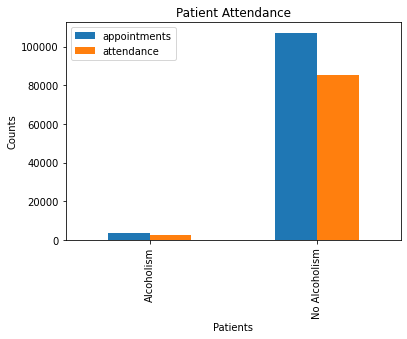

In [120]:
df_bar = pd.DataFrame([['Alcoholism',alc,alc_att], ['No Alcoholism', no_alc, no_alc_att]],
                  columns=['Patients', 'appointments', 'attendance'])

df_bar.plot(x='Patients',kind='bar',ylabel="Counts", stacked=False, title='Patient Attendance');

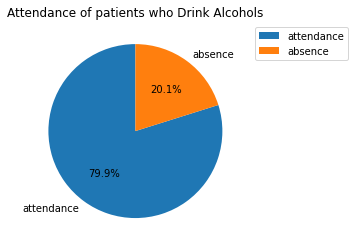

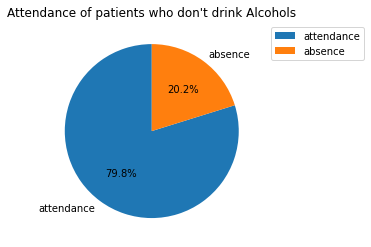

In [121]:
plt.pie([alc_att,(alc-alc_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance of patients who Drink Alcohols")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

plt.pie([no_alc_att,(no_alc-no_alc_att)],labels=["attendance","absence"], startangle=90, autopct='%1.1f%%')
plt.title("Attendance of patients who don't drink Alcohols")
plt.legend( loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


then we calculated the number of the alcoholics drinkers patients who attend their appointments, and we compared that with the non-alcoholic drinkers and their attendance ratios to their appointments.

it's all plotted in the bar chart and in the pie charts.

 #### at the following section we show the new columns and the correlations between them

In [122]:
df.head(0)

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days,appointment_weekday,age_intervals,lead_intervals


In [123]:
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_lead_days
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.034811
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.030423
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,-0.017218
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.027190
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.038520
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.019844
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.398143
no_show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000,0.186228
appointment_lead_days,0.034811,-0.030423,-0.017218,-0.027190,-0.038520,-0.019844,0.398143,0.186228,1.000000


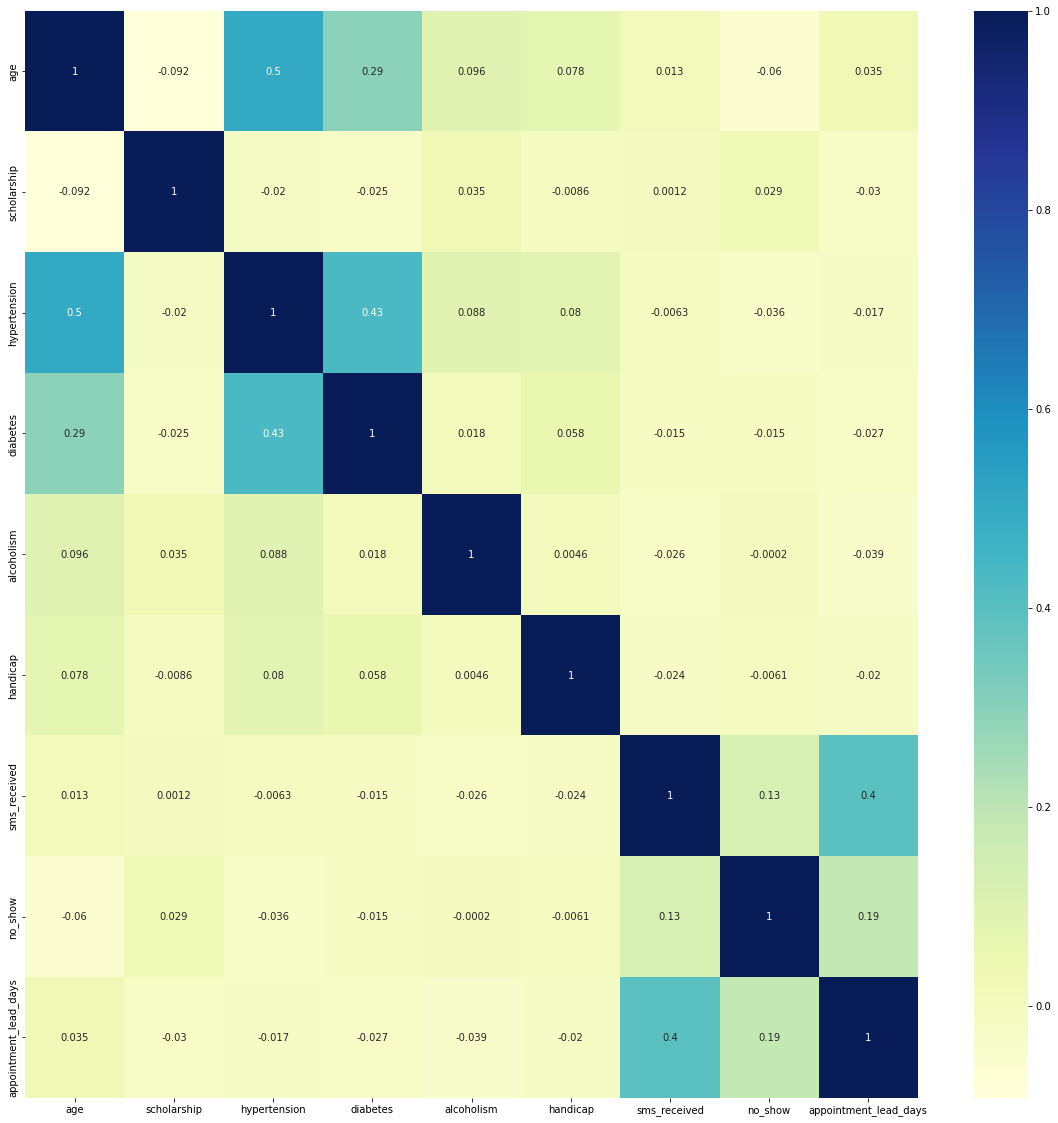

In [124]:
df_corr=df[['sms_received', 'age', 'alcoholism', 'diabetes',
    'hypertension', 'scholarship','appointment_lead_days','gender',"appointment_weekday",'neighbourhood']]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)
plt.savefig('Heat-Map of contingency table of Dataset Variables.png')

<a id='conclusions'></a>
## Conclusions


it's found that there are 110526 appointments, only 88207 appointment has been attended and 22319 have been missed.

**Gender Effect** : females has higher percentage of the appointments, but actually thier attendance percentage almost equals the percentage of males' attendance. (aprox. 80%)

**SMS Reminder:** it was a surprise that the percentage of attendance without SMS (83%) was higher than the percentage wit SMS(72%)

**Scholarship:** patients with scholarship were much fewer than patients without scholarship, but the attendance percentage of Scholarship patients (76.3%) are lower than the percentage of the no-scholarship Patients(80.2%).

**Day of Week:** it's found that the portion of patients for each day is varied, but the percentages of attendance are almost equal, which mean that the day of the week doesn't show an remarkable effect on the attendance.

**neighbourhood:**  it's found that the portion of appointments for neighorhoods are widely varried but the percentage of attendance are almost close

**Age:** it's found that age intervals have different portions of appointments and also different percentages of attendance, as follow:
   >patients of age 0-5 years have 8% of appointments, and attend their appointments with (81%).
   
   >patients of age 5-18 years have 16% of appointments, and attend their appointments with (76%).
   
   >patients of age 18-37 years have 26% of appointments, and attend their appointments with (77%).
   
   >patients of age 37-55 years have 25% of appointments, and attend their appointments with (81%).
   
   >patients of age 55-75 years have 21% of appointments, and attend their appointments with (85%).
   
   >patients of age 75-115 years have 5% of appointments, and attend their appointments with (84%).
   
    
    patients of age(55~75) are the most committed to appointments with attendance percentage=(85)
    then the patients of age (75~115) with attendance percentage =(84)
    
    while the patients of age(5~18) are the least committed to the appoinments with attendance percentage=(76)
    then the patients of age (18~37) with attendance percentage =(77)

**Lead Time:** it's found that lead time intervals have different portions of appointments and also different percentages of attendance, as follow:
    
    Appointments of lead time (same_day) have 7% of appointments, and attend their appointments with (79%).
   
    Appointments of lead time (withen_week) have 38% of appointments, and attend their appointments with (75%).
   
    Appointments of lead time (withen_2_week) have 18.7% of appointments, and attend their appointments with (69%).
   
    Appointments of lead time (withen_month) have 22% of appointments, and attend their appointments with (68%).
   
    Appointments of lead time (withen_3_month) have 14% of appointments, and attend their appointments with (67%).
   
    Appointments of lead time (withen_6_month) have 0.3% of appointments, and attend their appointments with (74%).
    
    
    the most committed appointments those which scheduled in the same day, with attendance percentage (79%),
    then the appointments which scheduled withen a week before the appointment day, with attendance percentage(75%);
    
    while the least committed are those which scheduled withen 3 months before the appointment day, with attendance percentage(67%),
    then the appointments which scheduled withen a month before the appointment day, with attendance percentage(68%).

   

**Diseases:** it's found that:

    Diabetic patients have (7%) of appointments, and attend their appointments with attendance percentage(82%), While the non-diabetic Patients percentage(80%)
    
    Hypertension Patients have (20%) of appointments, and attend their appointments with attendance percentage(83%), While the non-Hypertension patients percentage(79%)
    
    Handicap Patients have (2%) of appointments, and attend their appointments with attendance percentage(81%), While the non-diabetic Patients percentage(80%)
    
    So
    it seems that the attendance percentage for diabetic patients almost like the other patients' percentage
    
    while the attendance percentage for the hyper tension patients maybe **slighly less** than the percentage of other patients
    
    and the attendance percentage for the handicap patients almost equal the percentage of other patients
    
    

**Alcoholism:** it's found that just 3360 are alcoholics drinkers with a percentage of 3% out of the whole patients, and it's found that they have almost equal attendance percentage(80%) just like the non- alcholics drinkers.

### limitations

1) It would be better to provide the specific time of the appointment in hours, as it would widely affect the investigation.

2) The investigation is just limited by brazil, it wouldn't be accurate for other countries.

3) Providing the neighbourhood of the patient or the distance to be covered to reach the hospital would be improving the investigation.

4) providing the status of the patient of having a job or not, student or not. providing that would be an affecting factor on the investigation.
